### **Problem description : Credit Card Fraud detection**

Credit card fraud is a growing financial threat where unauthorized transactions are made using stolen or compromised card information. It leads to financial losses, identity theft, and unauthorized purchases, causing stress and inconvenience for customers. Victims may experience delays in refunds, damaged credit scores, and legal complications. Banks and financial institutions must implement robust fraud detection systems to protect consumers and mitigate risks.

Github Link : 



### **Unsupervised Learning Problem and Solution**

Credit card fraud detection is a critical issue in the financial sector, requiring efficient techniques to identify suspicious transactions. In this project, weI have used **unsupervised learning**, where the model **groups transactions without labeled fraud data**. Unlike supervised learning, where models are trained on known fraudulent and legitimate transactions, **unsupervised clustering techniques** like **K-Means, DBSCAN, and Affinity Propagation** help uncover hidden patterns and detect potential fraud. The goal is to **group similar transactions** and identify anomalies, which may indicate fraudulent activities.

### **Exploratory Data Analysis (EDA) Procedure**

EDA is performed to understand the dataset’s structure and characteristics before applying clustering models. The key steps include:

1.  **Loading and Inspecting Data**: Checking the number of transactions, feature types, and missing values.
    
2.  **Handling Missing Data**: Identifying and removing or imputing missing values.
    
3.  **Feature Selection & Cleaning**: Dropping unnecessary columns like customer IDs and categorical fields that do not contribute to clustering.
    
4.  **Data Distribution & Scaling**: Since ML models perform better with normalized data, **StandardScaler** is used to standardize numerical features.
    
5.  **Visualizing Trends**: Histograms, box plots, and scatter plots are generated to check for outliers and understand transaction behaviors.
    

### **Analysis (Model Building and Training)**

To uncover transaction patterns and potential fraud, we apply multiple clustering techniques:

1.  **K-Means Clustering**:
    
    *   Divides data into **K groups** based on similarity.
        
    *   Helps categorize transactions into normal, suspicious, and potentially fraudulent clusters.
        
2.  **DBSCAN (Density-Based Clustering)**:
    
    *   Detects anomalies based on **density** rather than predefined cluster numbers.
        
    *   Effective for finding outliers, which could indicate fraudulent transactions.
        
3.  **Affinity Propagation**:
    
    *   Automatically determines the number of clusters based on data similarities.
        
    *   Helps in discovering hidden spending patterns.
        
4.  **Dimensionality Reduction using PCA**:
    
    *   Reduces high-dimensional data to **2 or 3 principal components** while preserving essential transaction details.
        
    *   Allows better visualization and clustering.
        

Models are trained on the preprocessed dataset, and cluster assignments are analyzed for meaningful insights.

### **Results**

*   **Clusters formed by K-Means** show distinct transaction groups based on spending habits.
    
*   **DBSCAN identifies outliers**, which may correspond to **fraudulent transactions**.
    
*   **PCA visualization** confirms that fraudulent activities may lie in **isolated clusters** or extreme points.
    
*   Different clustering techniques provide complementary insights, helping analysts flag high-risk transactions.
    

### **Discussion & Conclusion**

This project successfully demonstrates how **unsupervised learning** techniques can help detect anomalies in financial transactions. By applying **clustering algorithms and PCA**, we identify **potential fraud cases** without labeled fraud data. While K-Means provides structured groups, DBSCAN effectively highlights **outliers**, making it a strong candidate for fraud detection. However, real-world deployment requires **further validation**, integration with **supervised fraud detection models**, and periodic model retraining. **Future improvements** may include combining clustering with **graph-based fraud analysis** and anomaly detection via deep learning.

This project analyzes credit card transaction data using clustering techniques and Principal Component Analysis (PCA) to detect patterns and potential fraud. The dataset is first preprocessed by handling missing values, standardizing features, and removing unnecessary columns. Clustering methods such as K-Means, DBSCAN, and Affinity Propagation are applied to group similar transactions, helping to identify anomalies that may indicate fraudulent activity. PCA is used to reduce the dataset's complexity while preserving essential information, making visualization and clustering more efficient. Finally, various graphs and charts are generated to interpret the results, providing insights into transaction behavior and fraud detection.

---

### Importing Necessary Libraries  

This code imports essential libraries for data analysis and visualization. **NumPy** and **Pandas** handle numerical computations and data processing, while **Seaborn** and **Matplotlib** help visualize trends. **SciPy** supports statistical analysis, and warnings are suppressed for cleaner output.  

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

### Loading and Exploring the Dataset  

The dataset is loaded using **Pandas** from a CSV file (`CC GENERAL.csv`). The **shape of the data** (number of rows and columns) is displayed to understand its size. The `describe()` function provides summary statistics, including **mean, standard deviation, minimum, and maximum values**, helping to understand the distribution of numerical features.  More details about dataset is provided in dataset.md

In [4]:
data = pd.read_csv(r'CC GENERAL.csv')
print('Data set Shape :', data.shape)
data.describe()

Data set Shape : (8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Viewing the First Few Rows of the Dataset  

The `head()` function displays the **first five rows** of the dataset. This helps in understanding the structure, column names, and sample values, giving an initial insight into the type of data available for analysis.  

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Cleaning: Dropping Unnecessary Columns and Checking for Missing Values  

- The **'CUST_ID'** column (customer identifier) is removed since it does not contribute to clustering. 
- The `isna().sum()` function checks for **missing values** in each column, helping identify potential data gaps that need handling before analysis.  

In [6]:
data = data.drop(columns='CUST_ID', axis=1, errors='ignore')
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Handling Missing Values  

- The `interpolate()` function fills missing values using **linear interpolation**, estimating values based on surrounding data points.  
- After interpolation, `isna().sum()` is used again to verify that all missing values have been successfully handled.  


In [7]:
data = data.interpolate()
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Visualizing Feature Correlations  

- The **correlation matrix** is computed using `data.corr()`, which measures how strongly each feature is related to the others.  
- A **heatmap** is plotted using **Seaborn**, where:  
  - Darker or lighter shades indicate the strength of correlation.  
- This helps identify **highly correlated features**, which can guide **dimensionality reduction** and feature selection.  

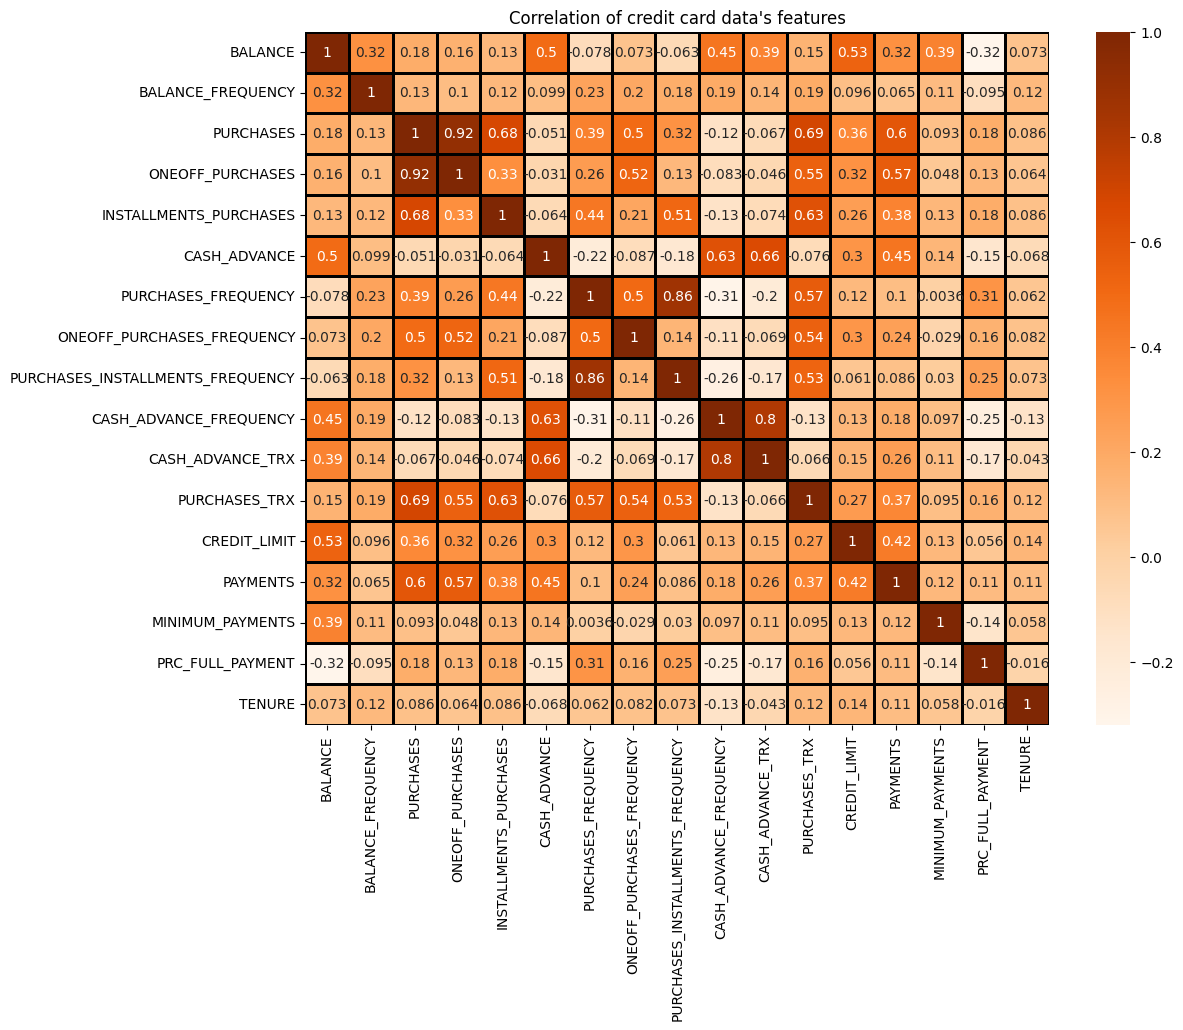

In [8]:
data_correlate = data.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(data_correlate, linecolor = 'black', linewidth = 1, annot = True, cmap='Oranges')
plt.title('Correlation of credit card data\'s features')
plt.show()

### Outlier Detection with Z-Scores

This code helps **identify outliers** in a dataset using Z-scores. Here's how it works:

- **Z-scores** measure how far each data point is from the mean, in terms of standard deviations.
- By taking the **absolute values**, the code focuses on the magnitude of deviation, ignoring direction.

In [9]:
from scipy import stats
z_score = np.abs(stats.zscore(data))
print(z_score)

[[0.73198937 0.24943448 0.42489974 ... 0.30931497 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08825036 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10142893 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33364691 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34501037 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33114491 0.52555097 4.12276757]]


### Filtering Outliers and Inspecting the Cleaned Data

This code performs the following steps:

1. **Filter Outliers**:  
   - Creates a new DataFrame (`data_outlier_free`) by keeping only rows where all Z-scores are less than **3** (a common threshold for outliers).
   - The `.all(axis=1)` ensures that all values in a row must satisfy the condition.

2. **Print Shape**:  
   - Displays the shape of the cleaned DataFrame (`data_outlier_free`) to show the number of rows and columns after removing outliers.

3. **Inspect Data**:  
   - Displays the first few rows of the cleaned DataFrame using `.head()` to verify the results.

This process ensures the dataset is free of extreme values while preserving its structure.

In [10]:
print(data.shape)
data_outlier_free = pd.DataFrame(data[(z_score < 3).all(axis=1)], columns = data.columns)
print(data_outlier_free.shape)
data_outlier_free.head()

(8950, 17)
(7433, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,436.038012,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Standardizing Data Using `StandardScaler`

This code standardizes the cleaned dataset (`data_outlier_free`) using `StandardScaler` from `sklearn.preprocessing`:

1. **Import and Initialize**:  
   - Import `StandardScaler` and create an instance of it (`scaler`).

2. **Fit and Transform**:  
   - Use `scaler.fit_transform()` to standardize the data. This process transforms the data to have a mean of **0** and a standard deviation of **1**.

This step ensures the data is scaled appropriately for machine learning algorithms or further analysis.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_outlier_free)
data_standardized = pd.DataFrame(data_standardized, columns = data.columns)
data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809720,-0.335494,-0.641527,-0.543552,-0.448135,-0.543884,-0.805290,-0.668856,-0.698435,-0.690747,-0.587329,-0.665326,-1.021782,-0.762965,-0.568225,-0.531569,0.311998
1,1.273134,0.090772,-0.734563,-0.543552,-0.636673,4.671774,-1.225838,-0.668856,-0.910691,0.883779,0.427635,-0.797605,1.021919,1.952976,0.617083,0.232555,0.311998
2,0.807149,0.517039,0.019451,0.430771,-0.636673,-0.543884,1.297443,2.808074,-0.910691,-0.690747,-0.587329,-0.003933,1.192228,-0.470387,0.051570,-0.531569,0.311998
3,0.261344,-1.188028,0.727299,1.345438,-0.636673,-0.377295,-1.015565,-0.379113,-0.910691,-0.165907,-0.333588,-0.731466,1.192228,-0.903455,-0.191439,-0.531569,0.311998
4,-0.297952,0.517039,-0.718960,-0.523390,-0.636673,-0.543884,-1.015565,-0.379113,-0.910691,-0.690747,-0.587329,-0.731466,-0.953659,-0.431215,-0.434449,-0.531569,0.311998


### Determining Optimal Clusters Using the Elbow Method

This code uses the **Elbow Method** to determine the optimal number of clusters for the K-Means clustering algorithm:

1. **Objective**:  
   - Find the best number of clusters by evaluating the **inertia** (sum of squared distances of samples to their closest cluster center) for different cluster counts.

2. **Setup**:  
   - Consider up to **30 clusters** (`num_clusters = 30`).
   - Initialize an array (`n_inertias`) to store inertia values for each cluster count.

3. **Iterate and Fit**:  
   - For each cluster count (from 1 to 30):
     - Create a `KMeans` instance with `i+1` clusters.
     - Fit the model to the standardized data (`data_standardized`).
     - Store the inertia value in `n_inertias`.

4. **Output**:  
   - The `n_inertias` array will contain the inertia values for each cluster count, which can be used to plot the Elbow Curve and identify the optimal number of clusters.

This method helps in selecting the number of clusters where adding more clusters does not significantly reduce inertia.

In [12]:
num_clusters = 30
n_inertias = np.zeros((1, num_clusters))
from sklearn.cluster import KMeans
for i in range(0, num_clusters):
    k_means = KMeans(i+1)
    k_means.fit(data_standardized)
    n_inertias[0, i] = k_means.inertia_

### Visualizing the Elbow Method

This code creates a plot to visualize the **Elbow Method** for determining the optimal number of clusters

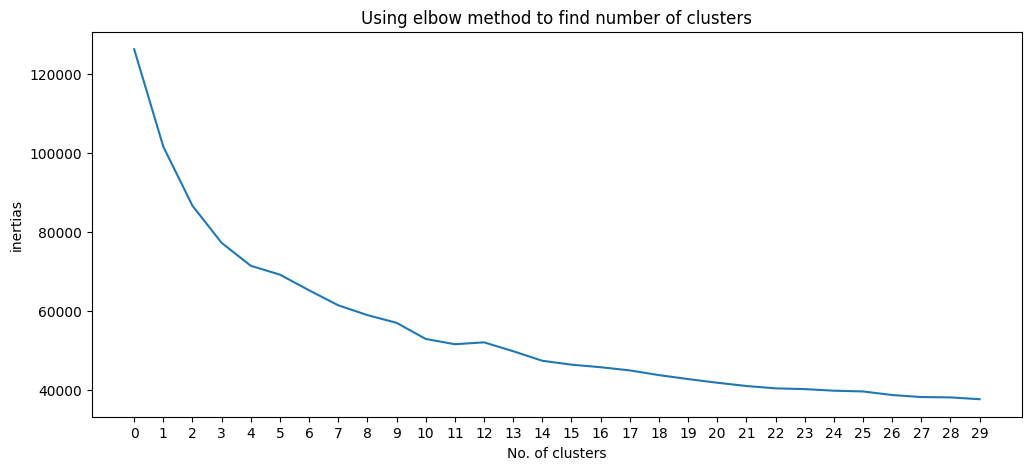

In [13]:
plt.figure(figsize =  (12, 5))
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.draw()

### Visualizing the Elbow Method with Annotations

This code enhances the Elbow Method plot by adding an annotation to highlight the optimal number of clusters:

1. **Arrow Properties**:  
   - Define arrow properties (`arrow_properties`) for the annotation, including color, width, and style.

2. **Add Annotation**:  
   - Annotate the plot to indicate the **abrupt change** (elbow point) at a cluster count of **7**:

3. **Plot Inertia Values**:  
   - Plot the inertia values (`n_inertias.flatten()`) against the number of clusters.

This visualization helps identify the optimal number of clusters (7 in this case) by highlighting the "elbow point" where the rate of decrease in inertia slows down.

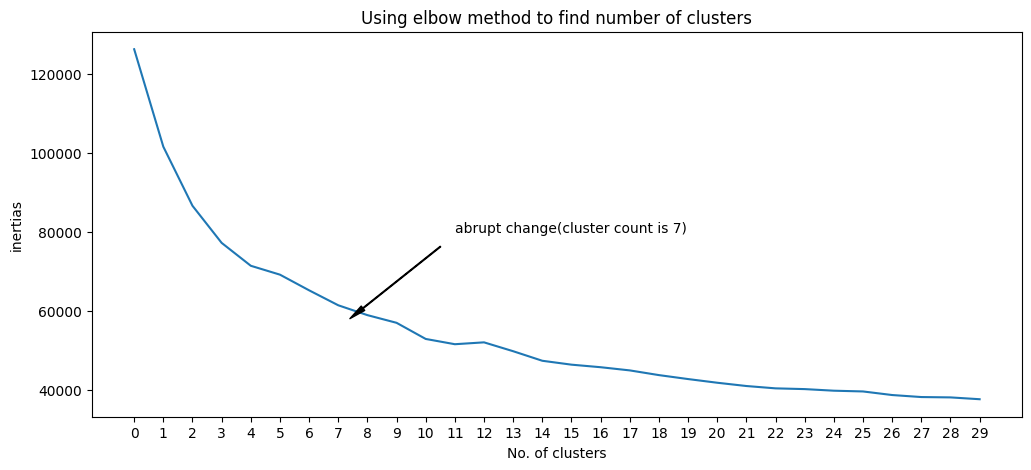

In [14]:
plt.figure(figsize =  (12, 5))
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

plt.annotate(
    "abrupt change(cluster count is 7)", xy=(7, 55700),
    xytext=(11, 80000),
    arrowprops=arrow_properties)
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.show()

The optimum number of clusters that is calculated by elbow method for kmeans is 7.

### Evaluating Clusters Using the Silhouette Score

This code uses the **Silhouette Score** to evaluate the quality of clusters for different numbers of clusters:

1. **Objective**:  
   - Determine the optimal number of clusters by calculating the **Silhouette Score**, which measures how similar an object is to its own cluster compared to other clusters.

2. **Setup**:  
   - Initialize empty lists to store Silhouette Scores (`silhouette_scores`) and the corresponding number of clusters (`num_clusters_list`).

3. **Iterate Over Cluster Counts**:  
   - For each number of clusters (`n_clusters`) from **2 to 29**:
     - Create a `KMeans` instance with the current number of clusters.
     - Fit the model and predict cluster labels (`preds`) for the standardized data (`data_standardized`).
     - Calculate the **Silhouette Score** using `silhouette_score` with the Euclidean metric.
     - Append the score and cluster count to their respective lists.

4. **Output**:  
   - The `silhouette_scores` list contains the Silhouette Scores for each cluster count, which can be used to identify the optimal number of clusters (higher scores indicate better-defined clusters).

This method complements the Elbow Method by providing a quantitative measure of cluster quality.

In [15]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

### Visualizing the Silhouette Score Method

This code creates a plot to visualize the **Silhouette Score** for determining the optimal number of clusters

This visualization helps identify the optimal number of clusters by highlighting the cluster count with the highest Silhouette Score, indicating well-separated and cohesive clusters.

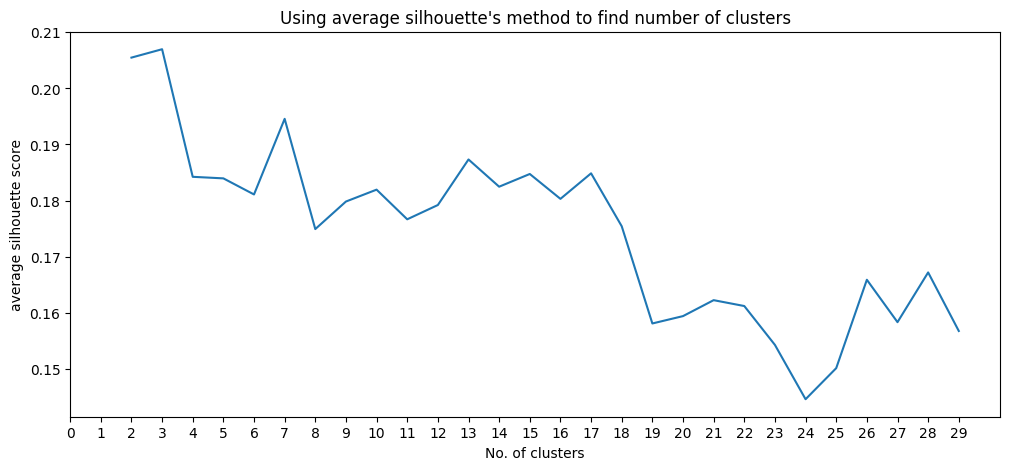

In [16]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

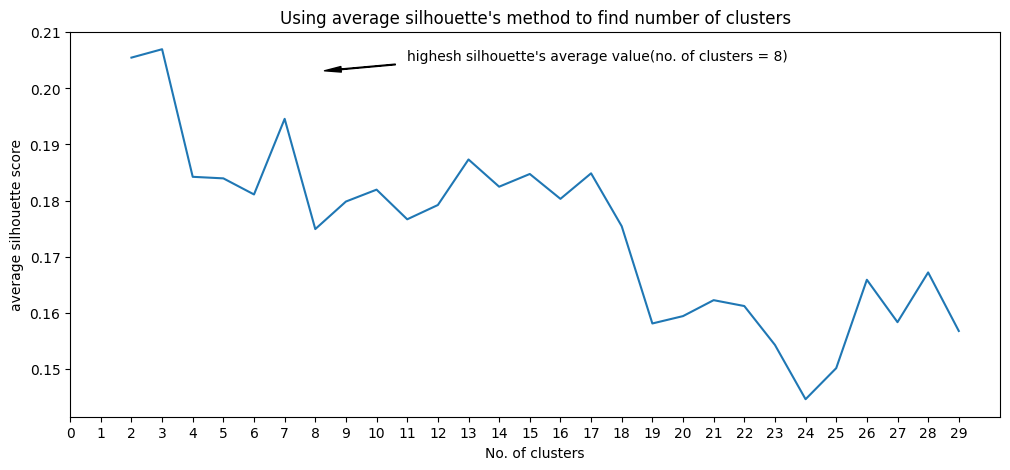

In [17]:
plt.figure(figsize = (12, 5))
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

plt.annotate(
    "highesh silhouette's average value(no. of clusters = 8)", xy=(8, 0.203),
    xytext=(11, 0.205),
    arrowprops=arrow_properties)
plt.plot(num_clusters_list, silhouette_scores)
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.xticks(range(0, 30, 1))
plt.show()

The optimum number of clusters calculated by silhouette's average method is 8.

### Visualizing Clusters Using PCA

This code uses Principal Component Analysis (PCA) to visualize the clusters obtained from the K-Means algorithm with 7 clusters:

Steps:
1. Initialize KMeans with 7 clusters.
2. Fit the KMeans model to the standardized data.
3. Retrieve the cluster labels for each data point.

This visualization helps in understanding the distribution and characteristics of different clusters in a 2D space.

In [18]:
k_means_7 = KMeans(7)
k_means_7.fit(data_standardized)
k_means_7_labels = k_means_7.labels_

The labels obtained by the kmeans algorithm is saved in k_means_7_labels. 
Saving the output into a separate data frame.

In [19]:
data_out_1 = pd.concat([data_outlier_free, pd.DataFrame({'clusters_kmeans7': k_means_7_labels})], axis = 1)

### Visualizing Clusters Using FacetGrid

This code uses **Seaborn's FacetGrid** to visualize the distribution of features across different clusters obtained from the K-Means algorithm with 7 clusters:

1. **Iterate Over Features**:  
    - For each feature in the `data_outlier_free` DataFrame:
      - Create a `FacetGrid` with the `data_out_1` DataFrame, specifying the column to facet by (`clusters_kmeans7`).

2. **Plot Histograms**:  
    - Use the `map` function to plot histograms for each feature within each cluster.

This visualization helps in understanding the distribution and characteristics of different features across the clusters.

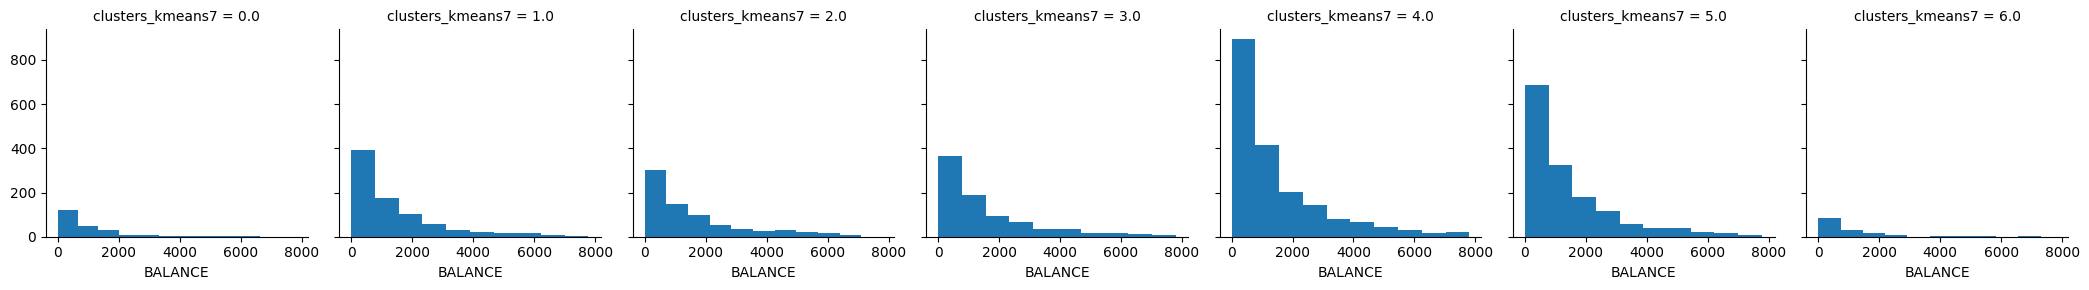

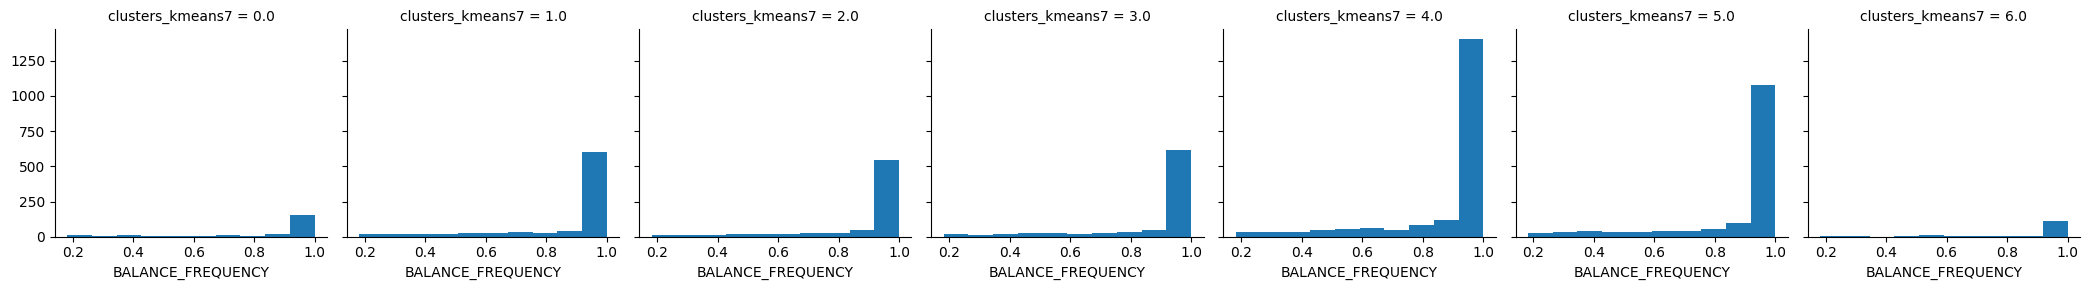

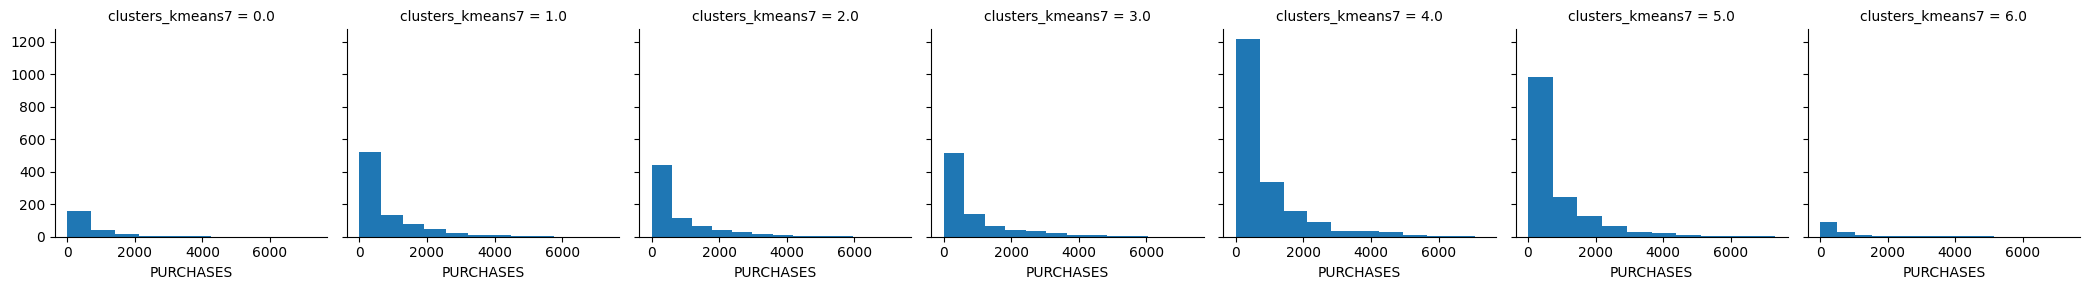

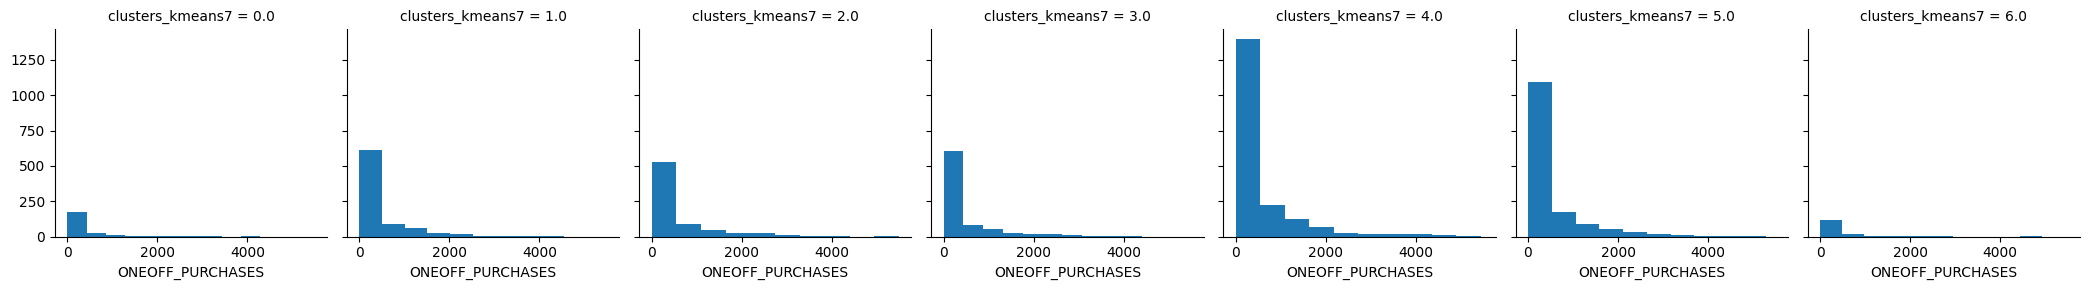

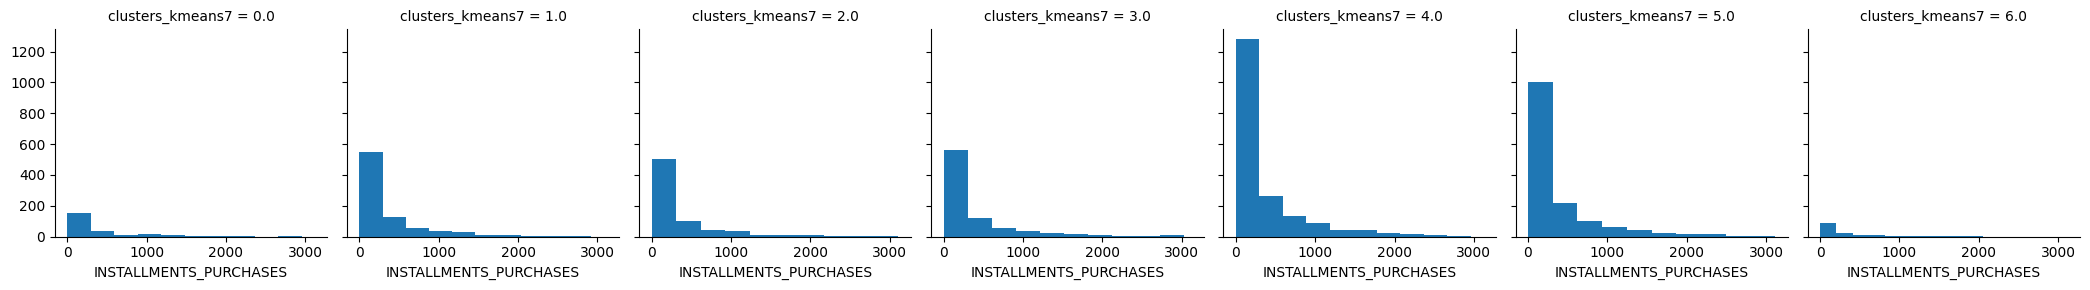

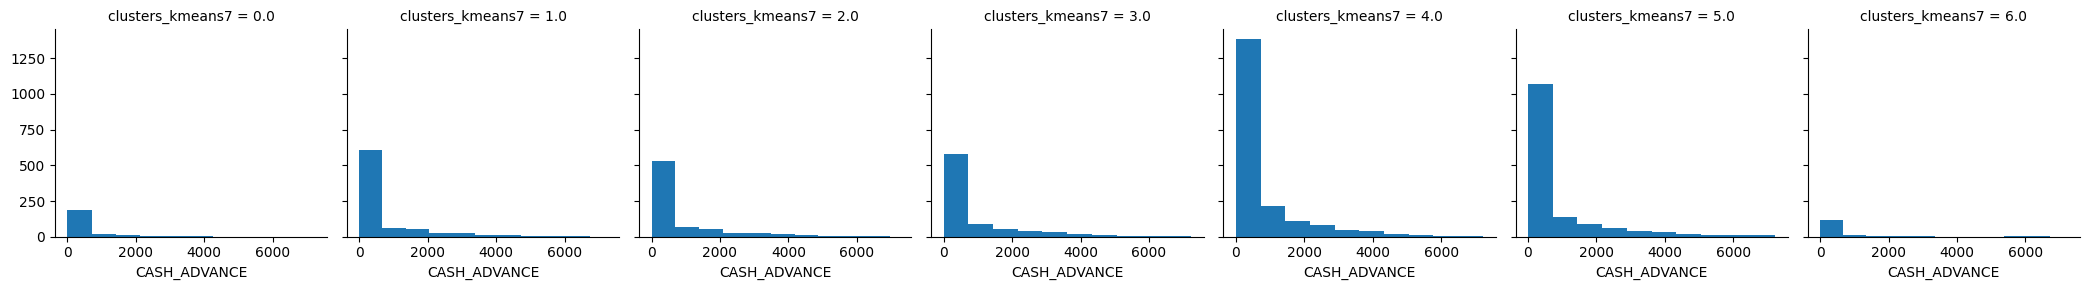

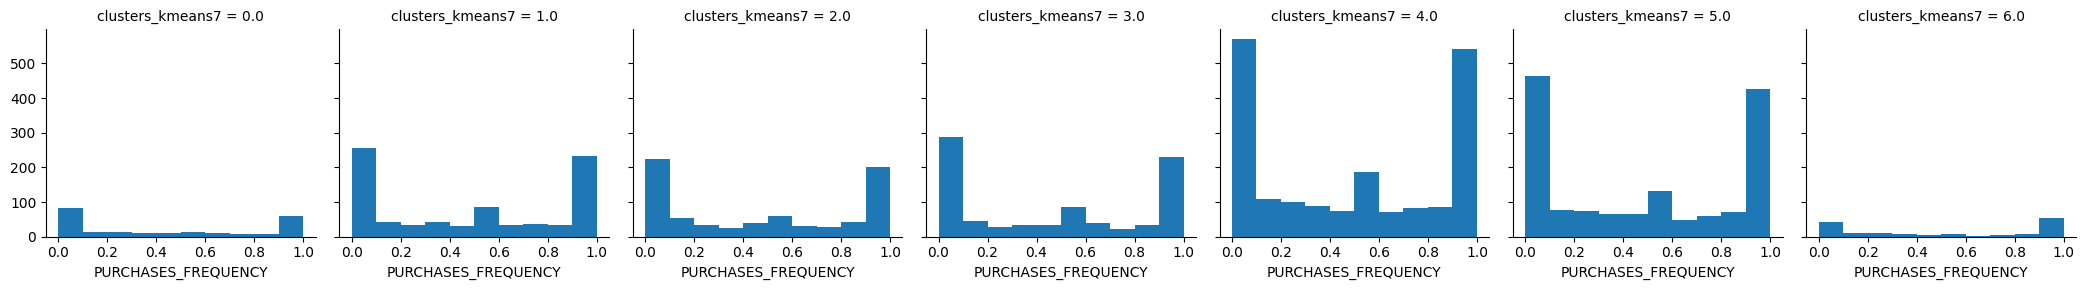

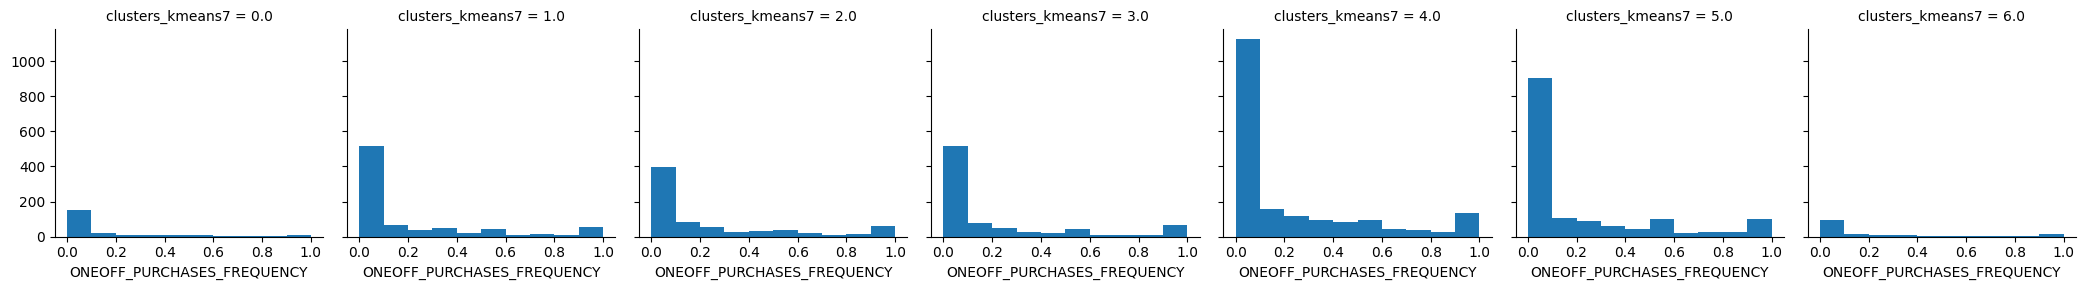

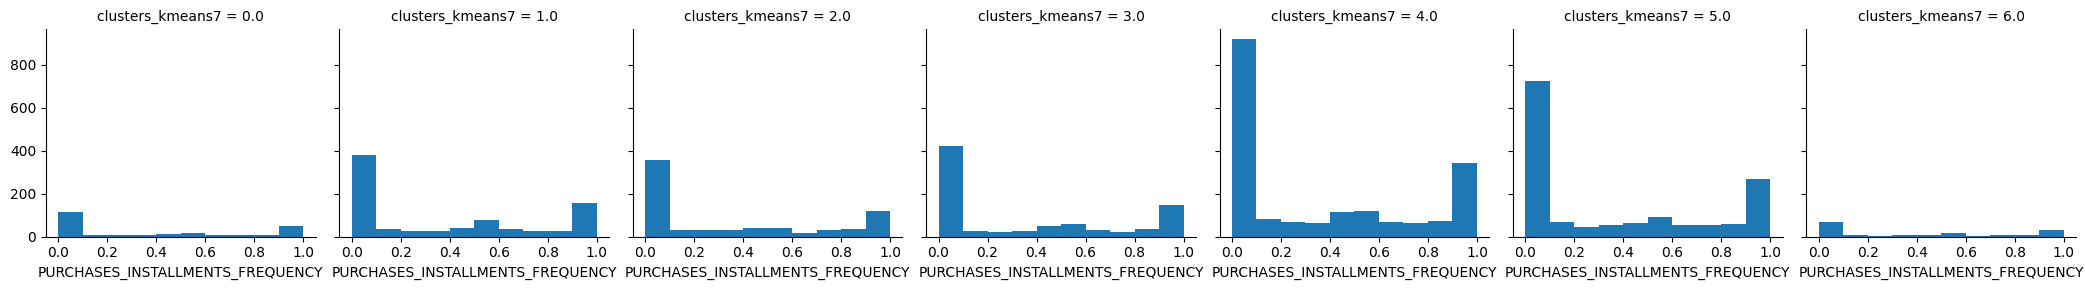

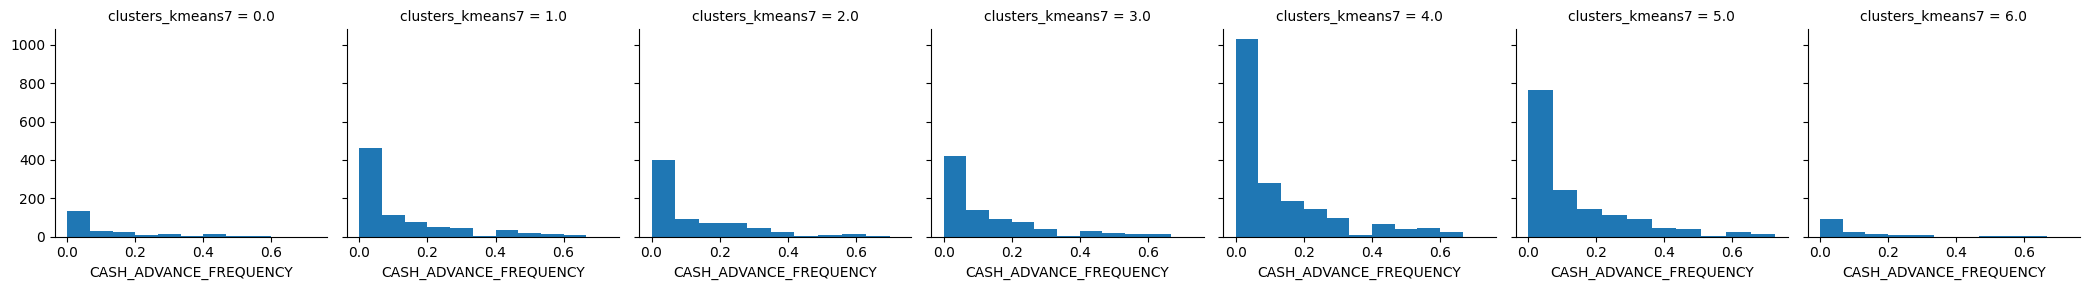

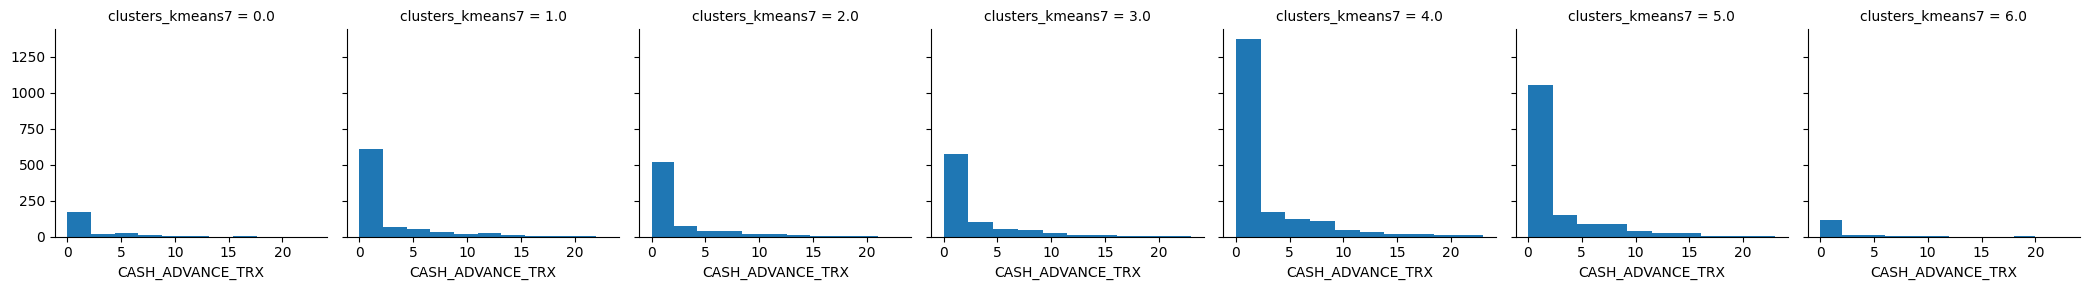

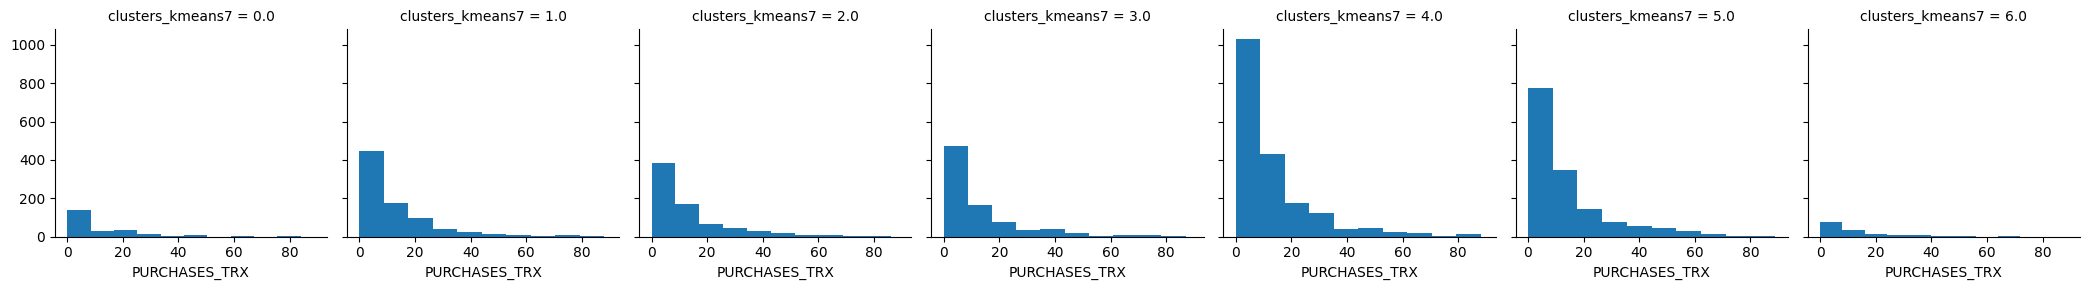

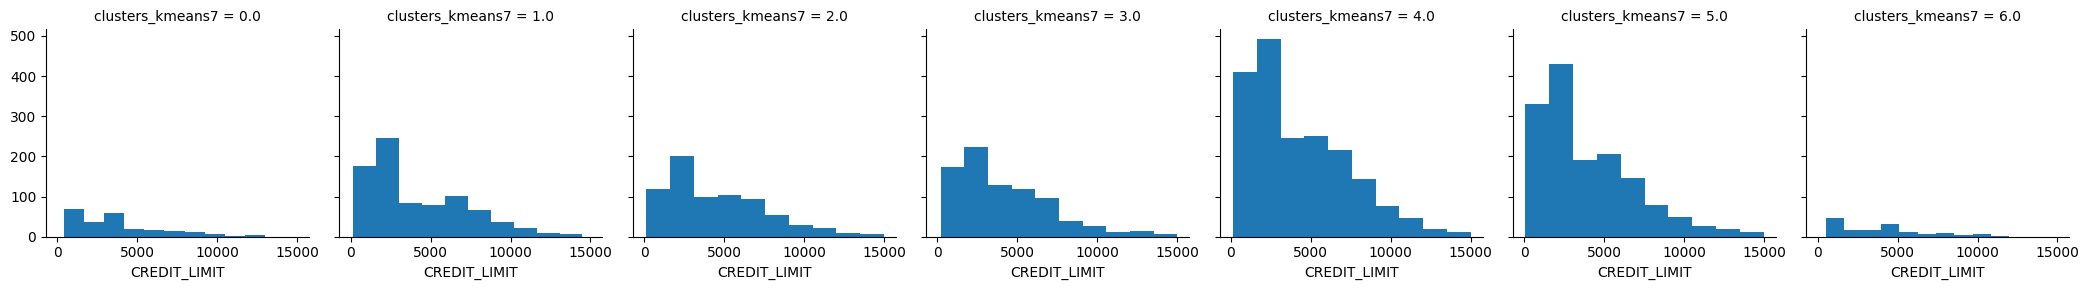

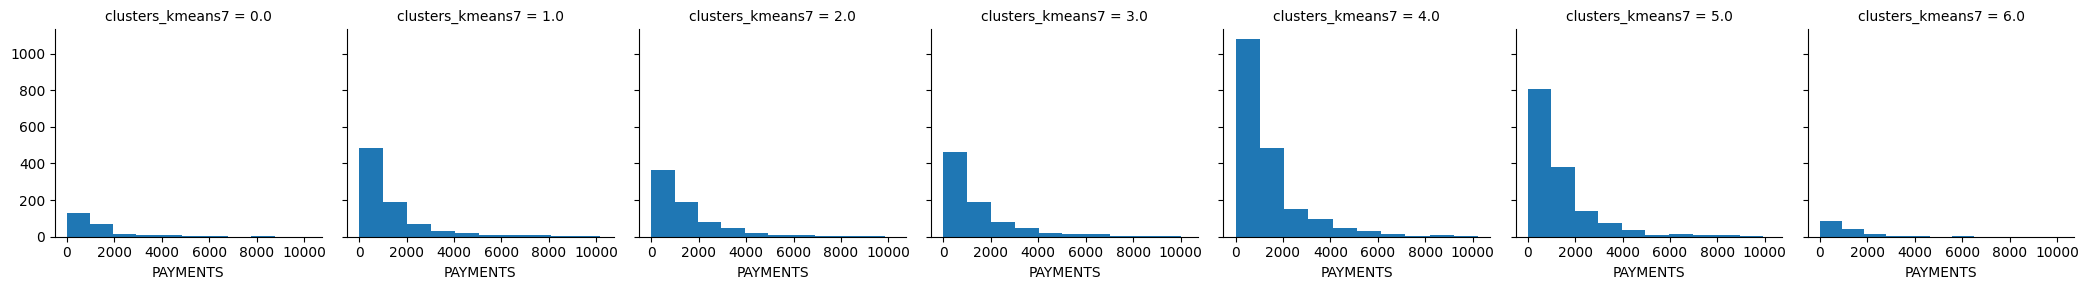

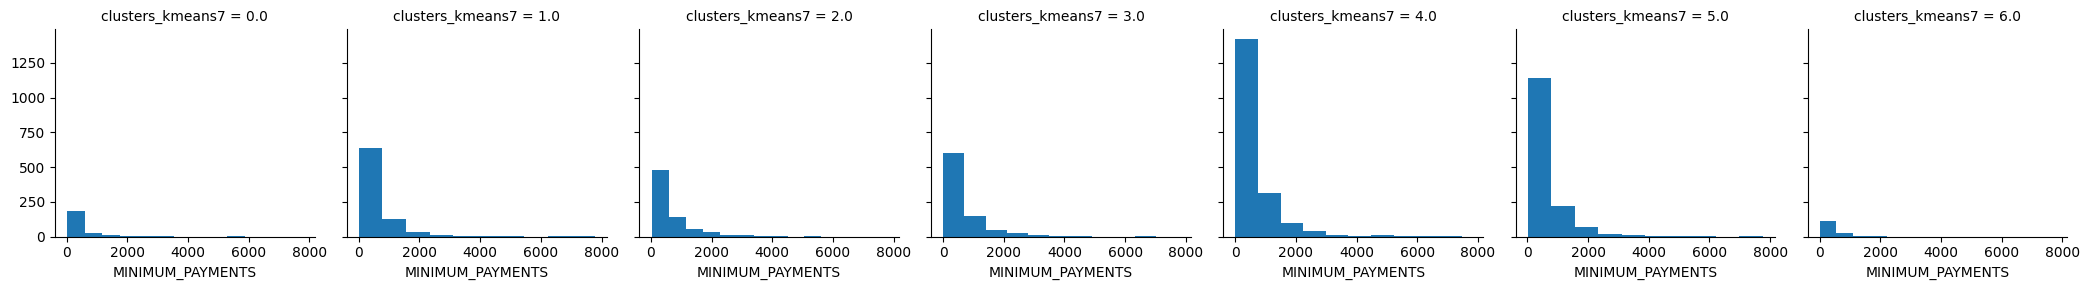

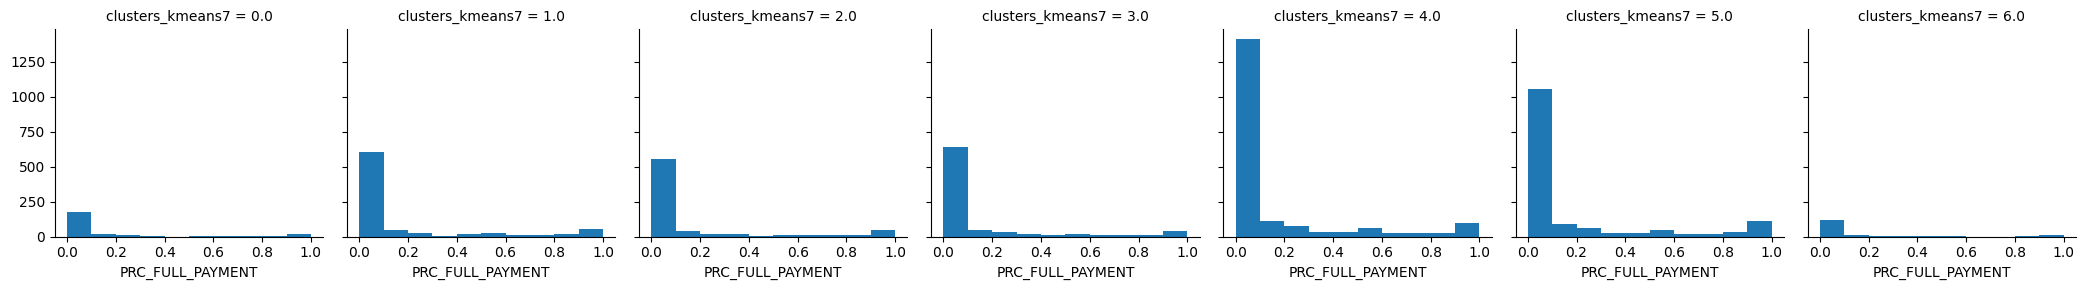

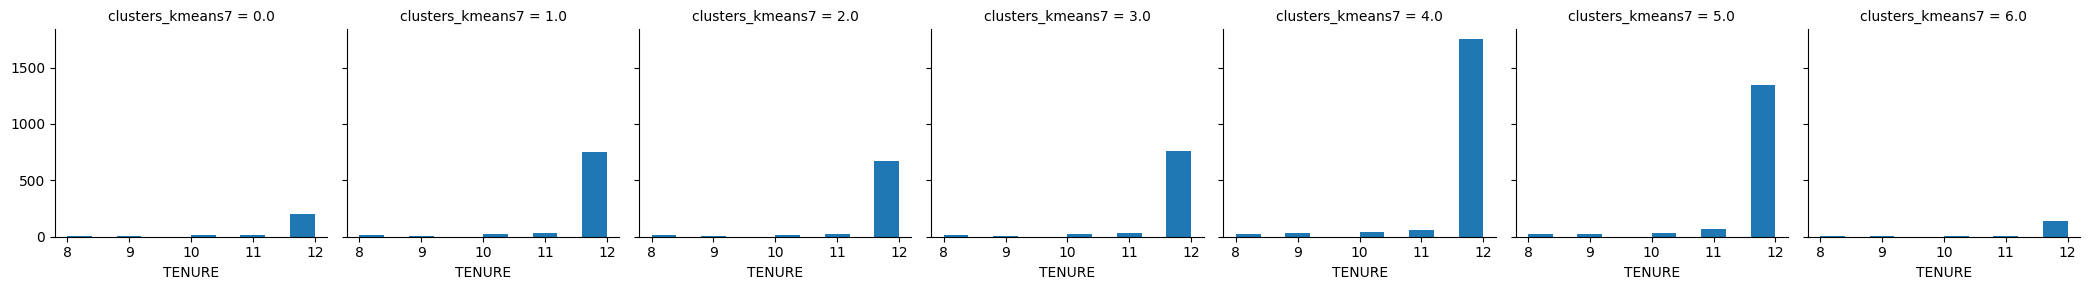

In [20]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_1, col = 'clusters_kmeans7')
    g.map(plt.hist, cols)

### Visualizing Clusters Using PCA

This code uses Principal Component Analysis (PCA) to visualize the clusters obtained from the K-Means algorithm with 8 clusters:

Steps:
1. Initialize KMeans with 8 clusters.
2. Fit the KMeans model to the standardized data.
3. Retrieve the cluster labels for each data point.

This visualization helps in understanding the distribution and characteristics of different clusters in a 2D space.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
affinities = 1 - cosine_similarity(data_standardized)
pca = PCA(2)
pca.fit(affinities)
see_PCA = pca.transform(affinities)

# PCA Visualization of K-Means Clustering

This visualization applies **Principal Component Analysis (PCA)** to reduce high-dimensional data into two principal components, making it easier to interpret **K-Means clustering results**. The clusters represent different customer behaviors based on credit card usage. 

This visualization helps in identifying distinct **customer segments** based on credit card usage patterns, aiding in targeted marketing, risk analysis, and financial decision-making.


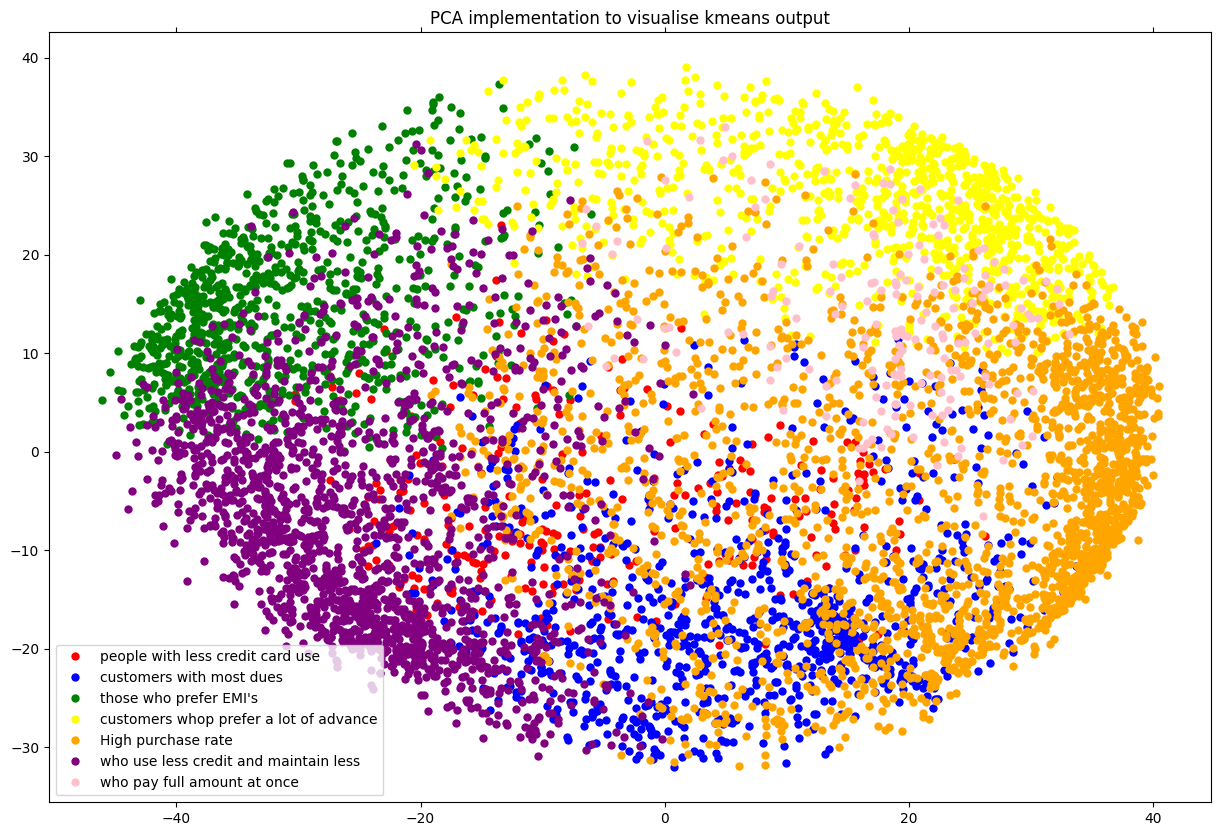

In [22]:
x, y = see_PCA[:, 0], see_PCA[:, 1]

colors = {0: 'red', 
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
         5: 'who use less credit and maintain less',
         6: 'who pay full amount at once'}
  
df = pd.DataFrame({'x': x, 'y':y, 'labels':k_means_7_labels}) 
groups = df.groupby('labels')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("PCA implementation to visualise kmeans output")
plt.show()

2.**K-MEANS**

Performs K-Means clustering with 8 clusters on standardized data and stores the cluster labels.  

In [23]:
k_means_8 = KMeans(8)
k_means_8.fit(data_standardized)
k_means_8_labels = k_means_8.labels_

In [24]:
data_out_2 = pd.concat([data_out_1, pd.DataFrame({'clusters_kmeans8': k_means_8_labels})], axis = 1)

Creates facet grid histograms for each feature in `data_outlier_free`, grouped by K-Means (8 clusters) labels.  

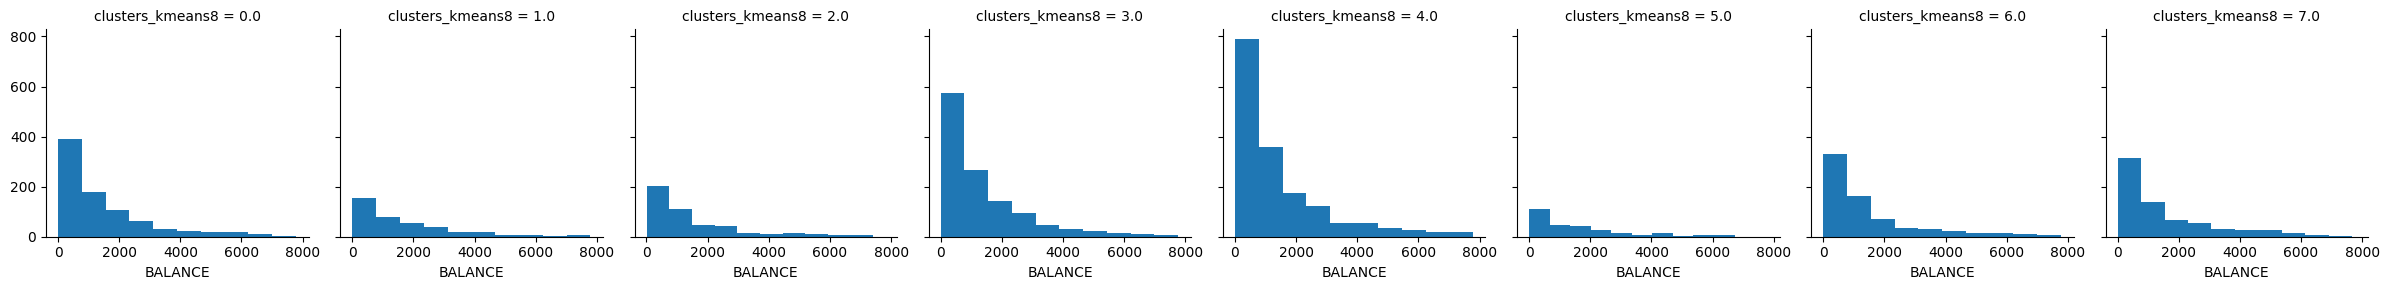

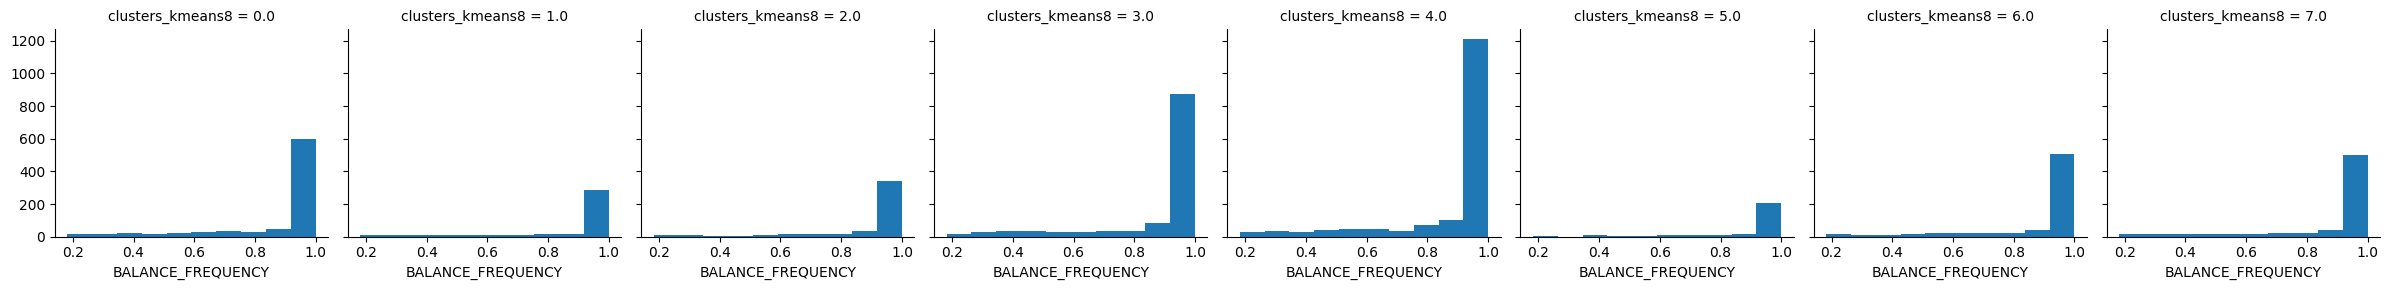

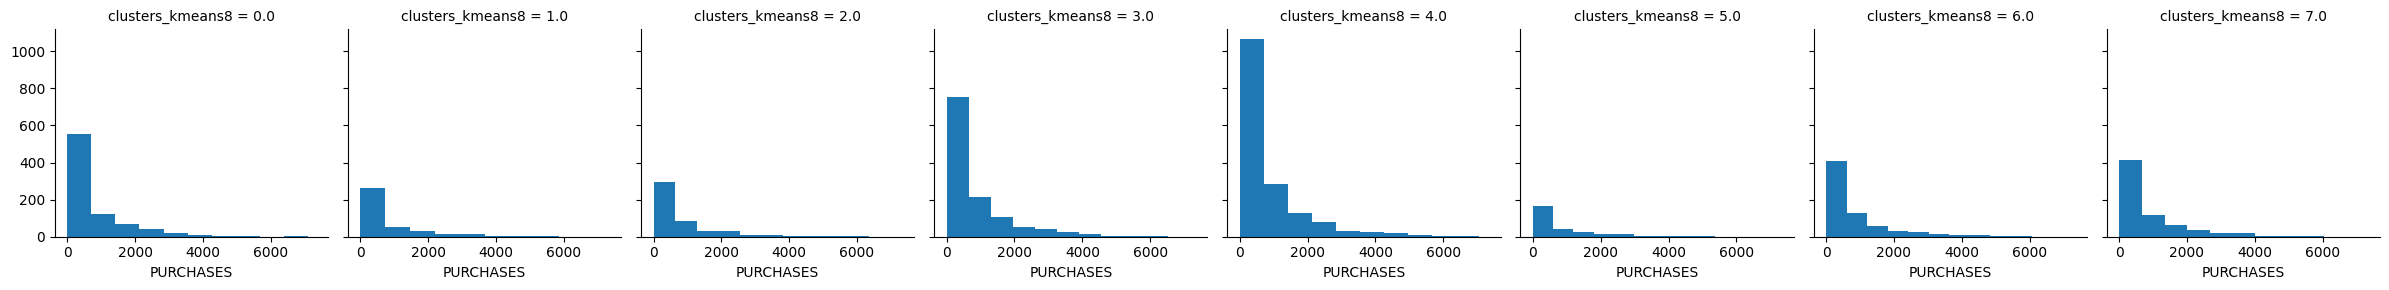

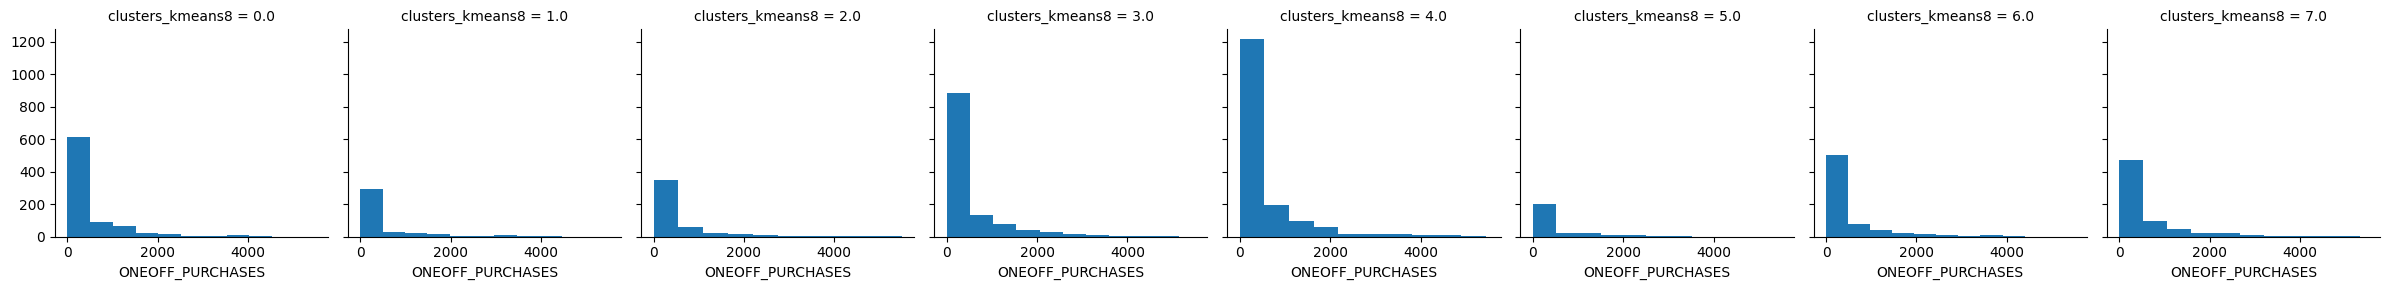

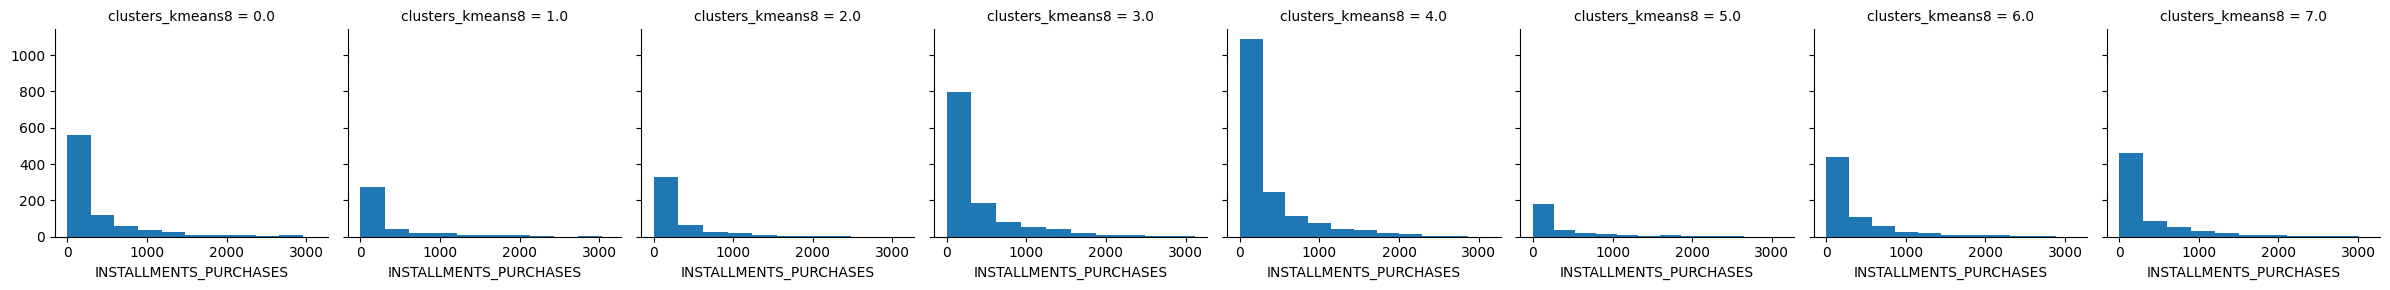

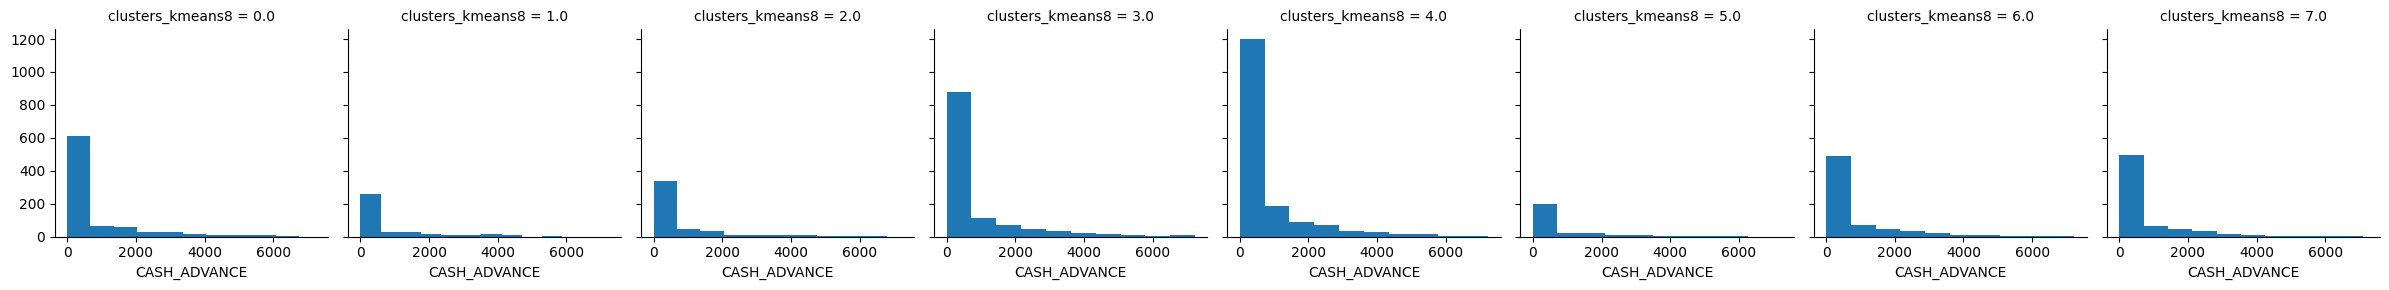

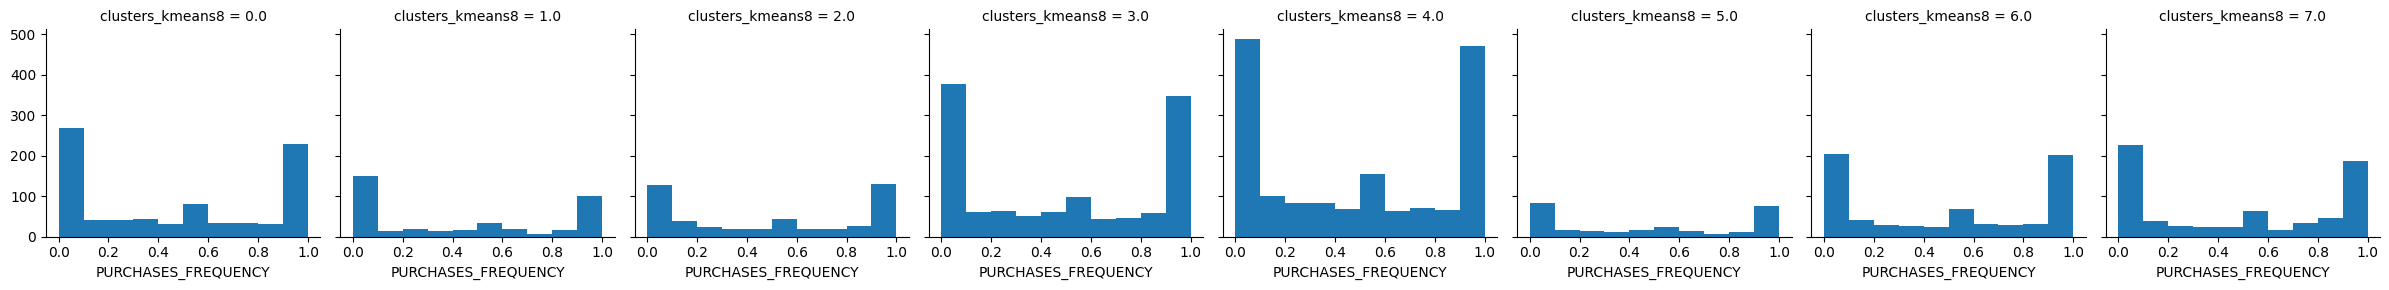

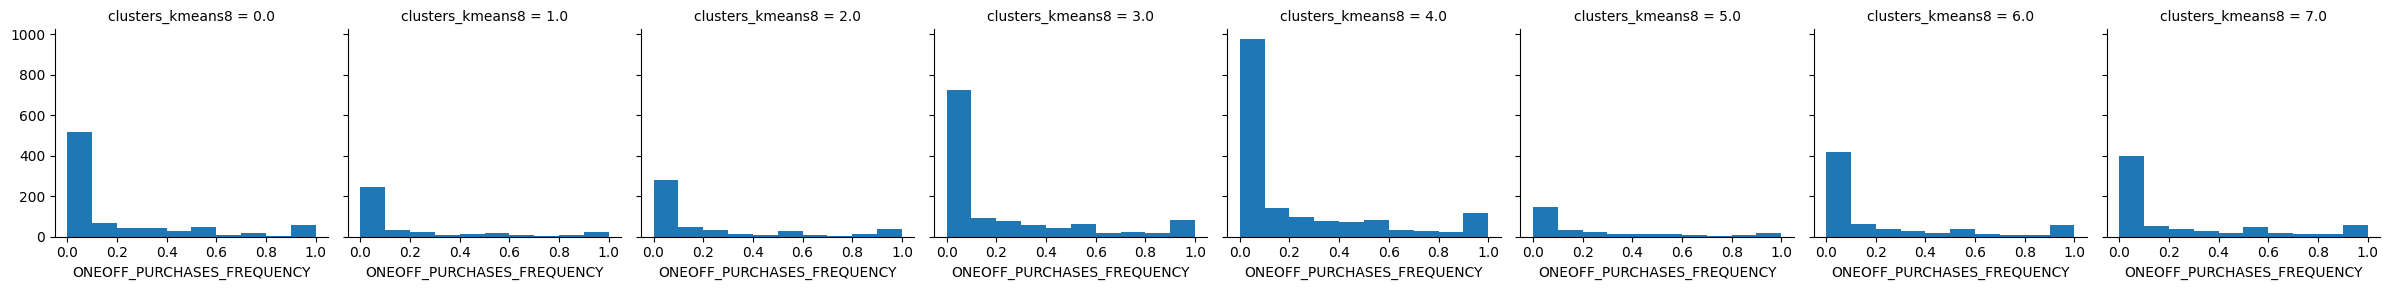

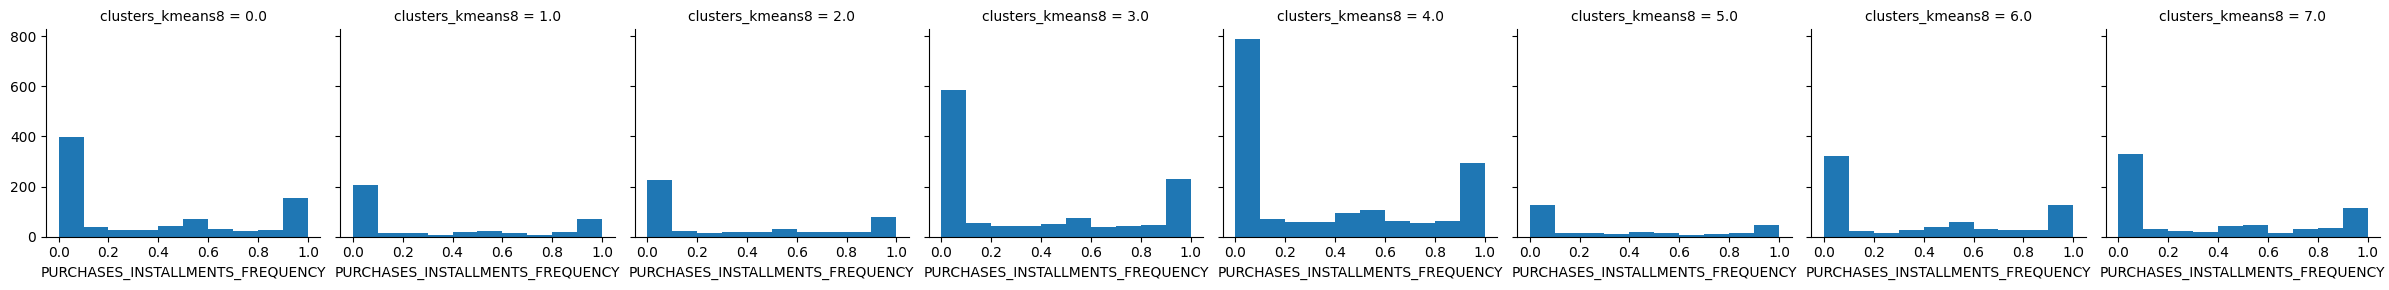

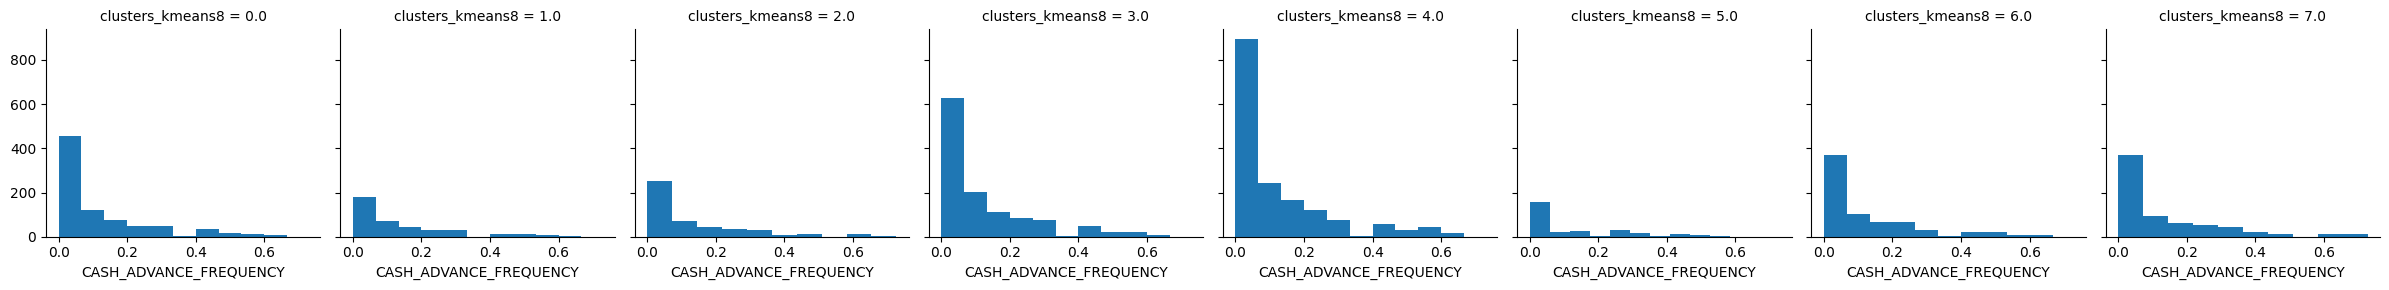

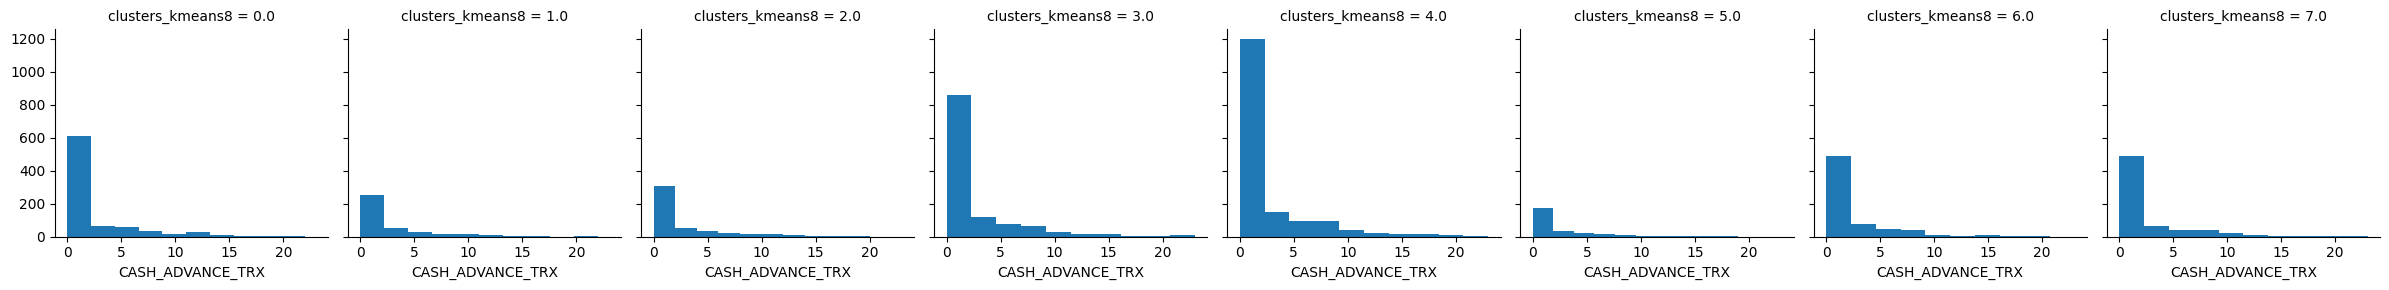

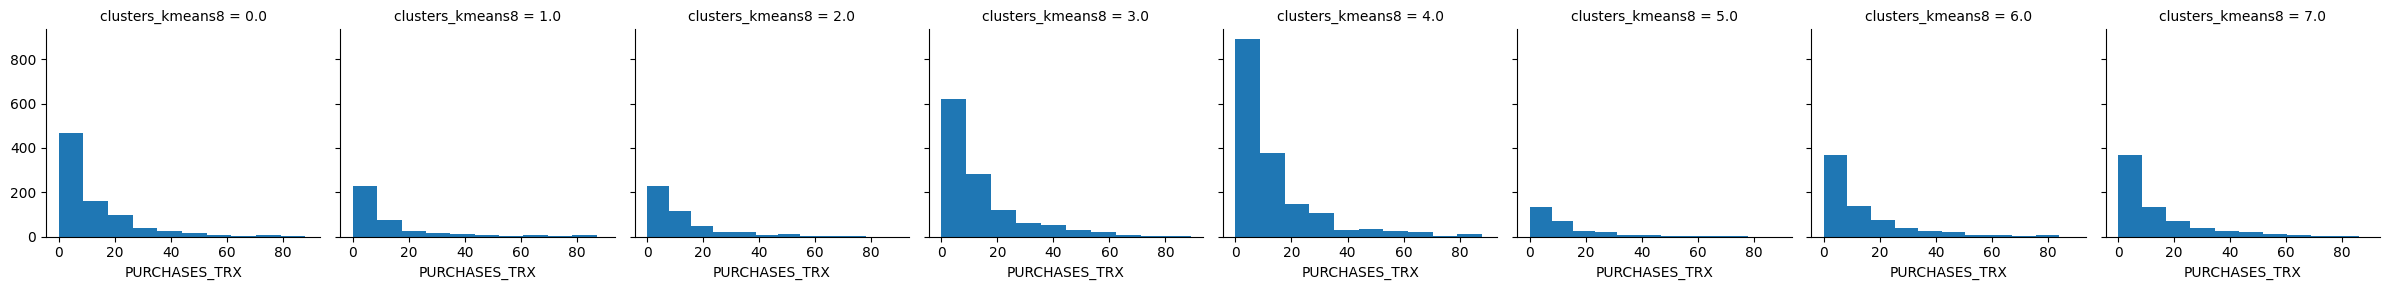

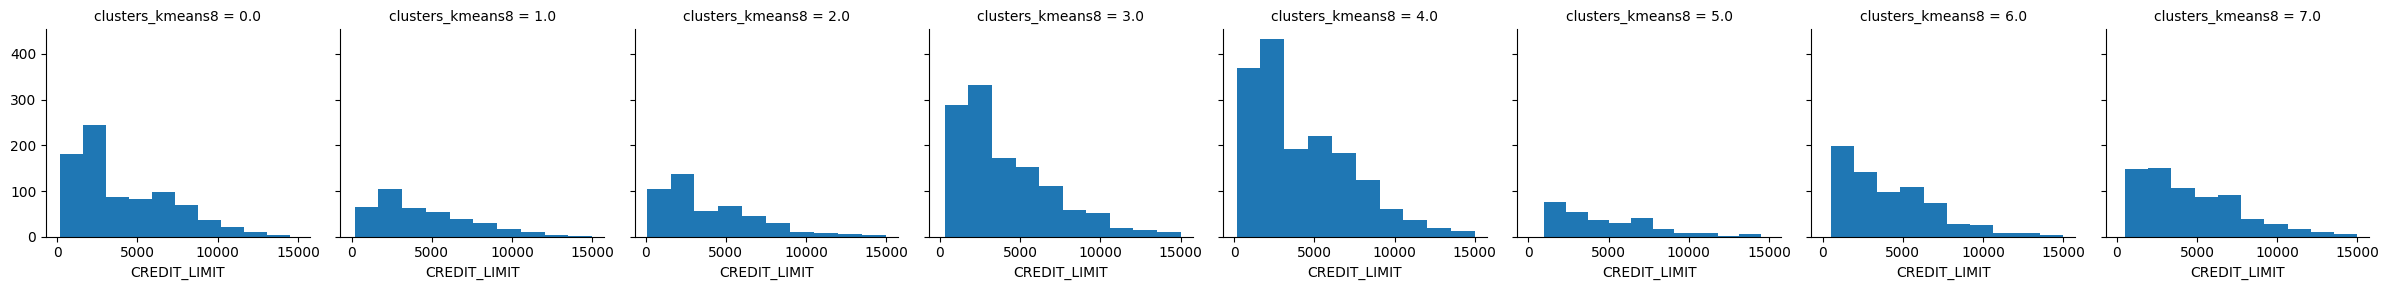

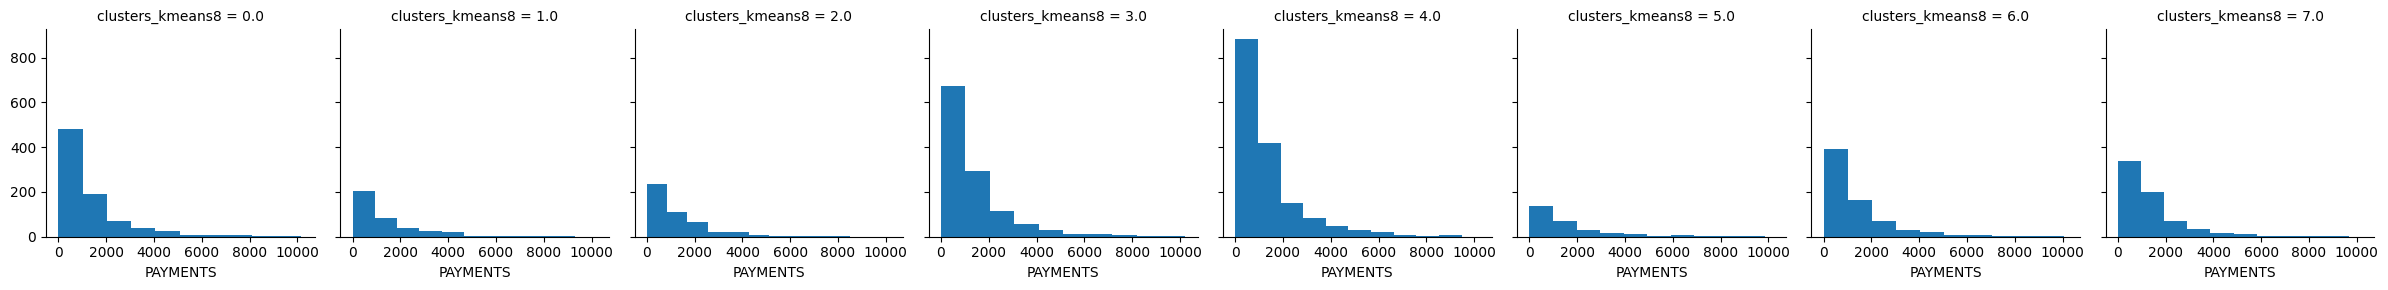

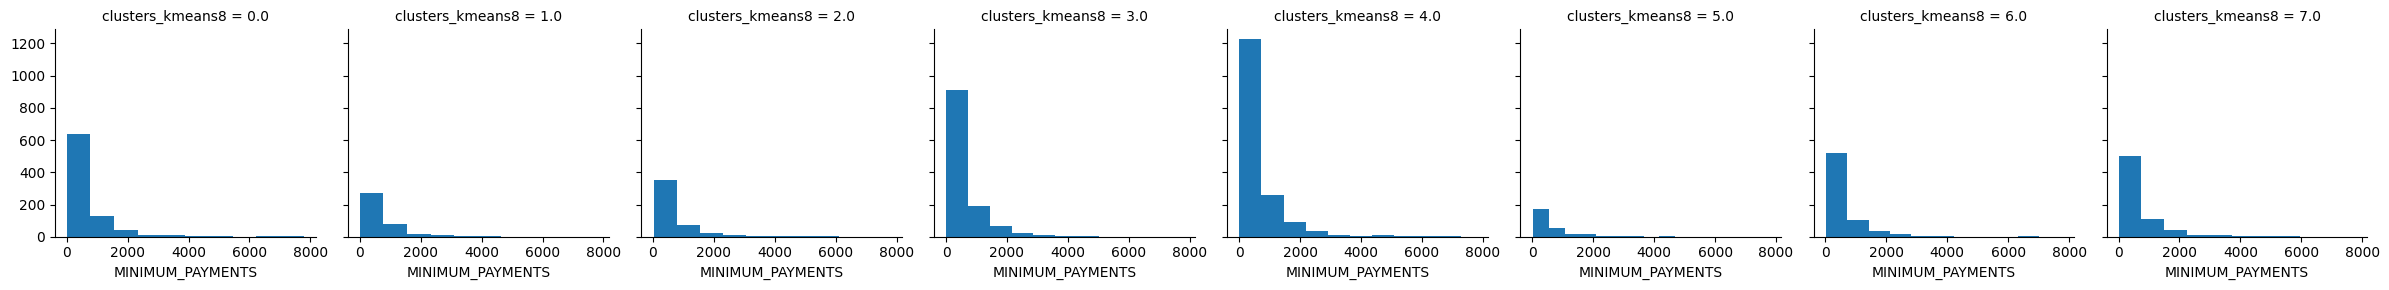

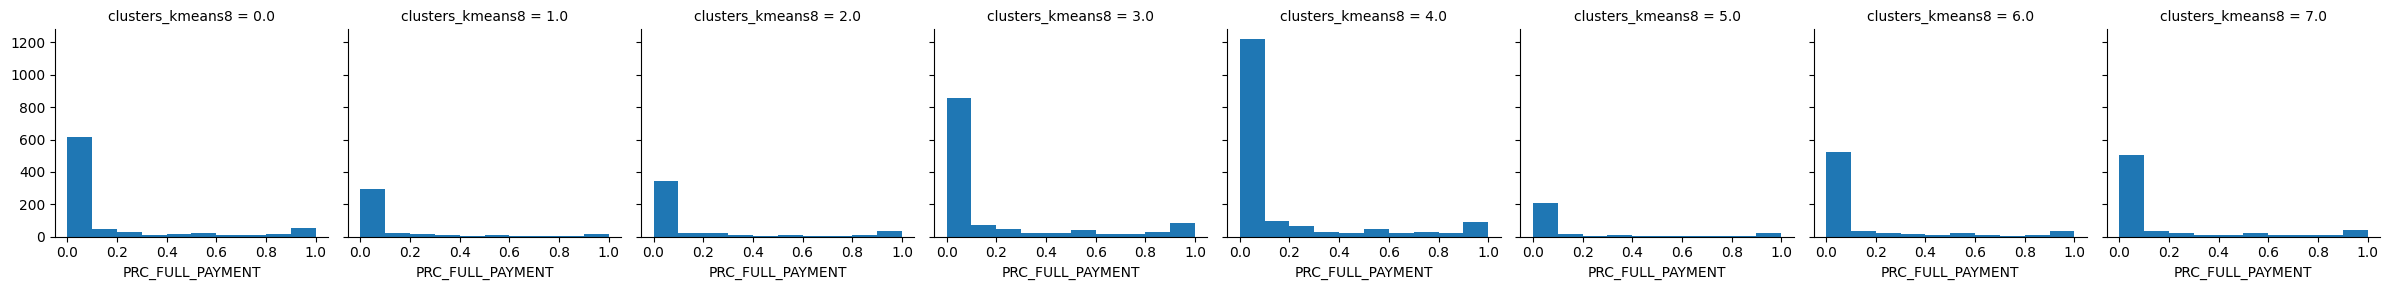

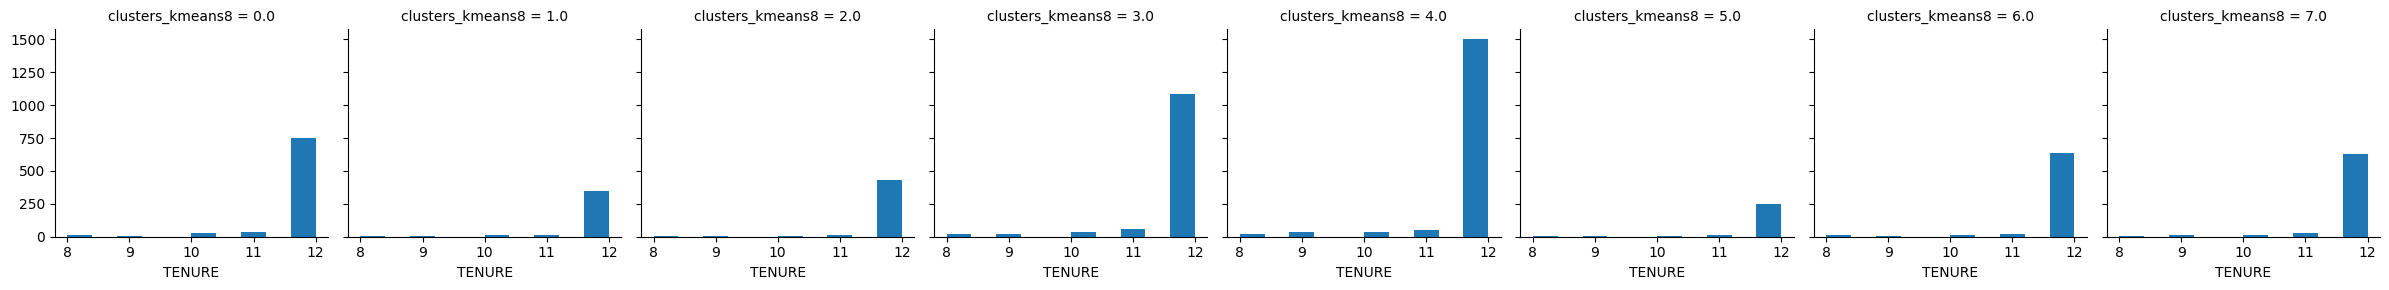

In [25]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_2, col = 'clusters_kmeans8')
    g.map(plt.hist, cols)

**Using ICA to visualize the obtainted clusters.**

Using dimensionality reduction technique ICA to visualise the multidimensional array

Applies Fast Independent Component Analysis (ICA) with 2 components on `affinities` and transforms the data.  

In [26]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(2)
fast_ica.fit(affinities)
see_ICA = fast_ica.transform(affinities)

Visualizes K-Means (8 clusters) results using ICA-transformed components, coloring points by cluster and labeling them with descriptive categories.  

- Generates a scatter plot using ICA-transformed components, where each point represents a customer.  
- Colors and labels clusters based on K-Means (8 clusters), providing insights into different customer behaviors.  
- Enhances interpretability by mapping each cluster to a descriptive category, aiding in customer segmentation analysis.  

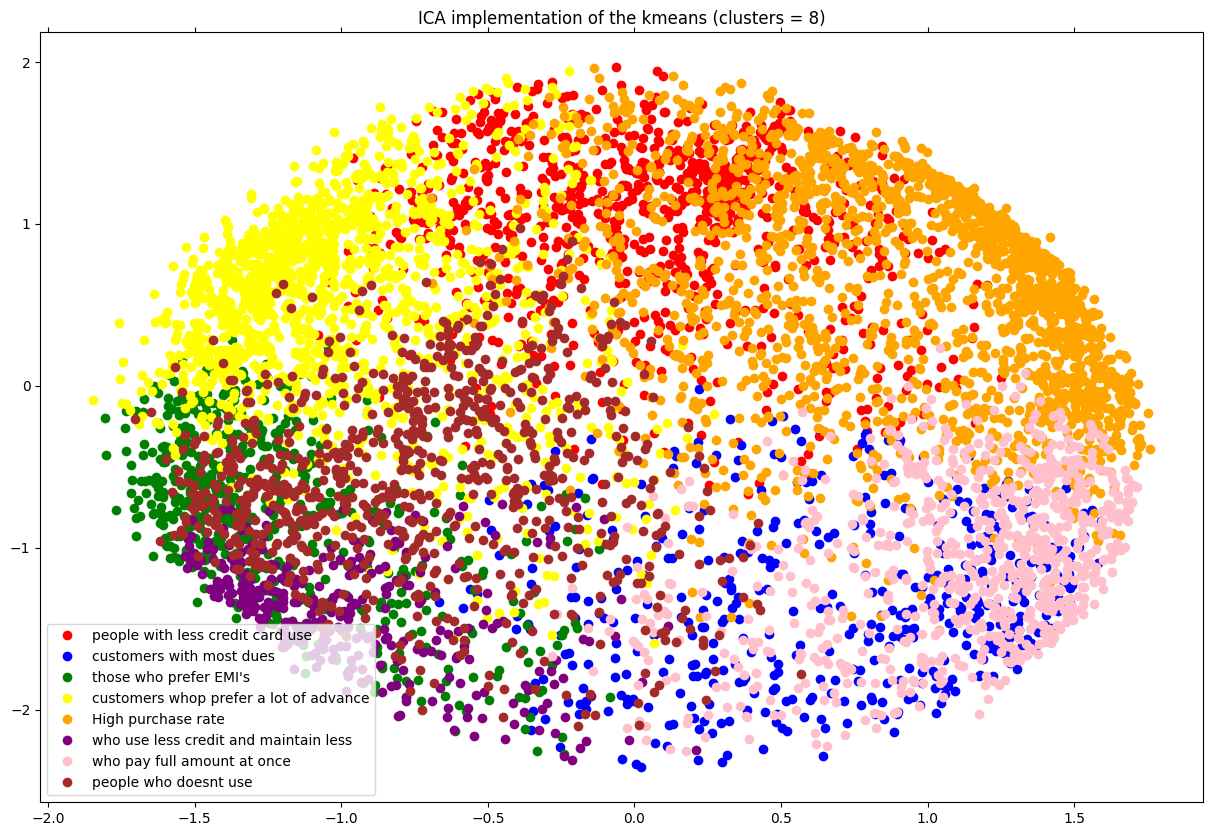

In [27]:
x, y = see_ICA[:, 0], see_ICA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'pink',
          7: 'brown'}

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
         5: 'who use less credit and maintain less',
         6: 'who pay full amount at once',
         7: 'people who doesnt use'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':k_means_8_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("ICA implementation of the kmeans (clusters = 8)")
plt.show()

3. **AFFINITY PROPAGATION**

In [28]:
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation(damping=0.9)
affinity_propagation.fit(data_standardized)
affinity_propagation_labels = affinity_propagation.labels_


In [29]:
data_out_3 = pd.concat([data_out_2, pd.DataFrame({'affinity_propagation': affinity_propagation_labels})], axis = 1)

using single value decomposition to visualize the multidimensional data

- Performs Agglomerative Clustering with 7 clusters on standardized data.  
- Assigns cluster labels to each data point for hierarchical grouping.  
- Useful for identifying nested structures in the data based on similarity.  

In [30]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(7)
agglomerative_clustering.fit(data_standardized)
agglomerative_clustering_labels = agglomerative_clustering.labels_

In [31]:
data_out_4 = pd.concat([data_out_3, pd.DataFrame({'agglomerative_clustering': agglomerative_clustering_labels})], axis = 1)

- Creates facet grid histograms for features in `data_outlier_free`, grouped by Agglomerative Clustering labels.  
- Helps visualize the distribution of data across different hierarchical clusters.  
- Useful for understanding feature variations within each cluster.  

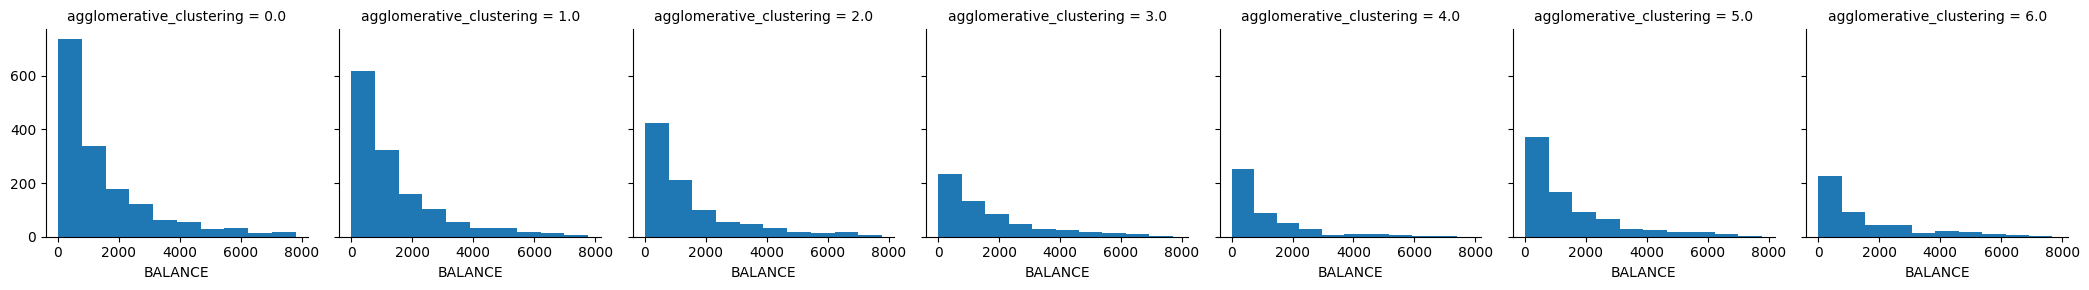

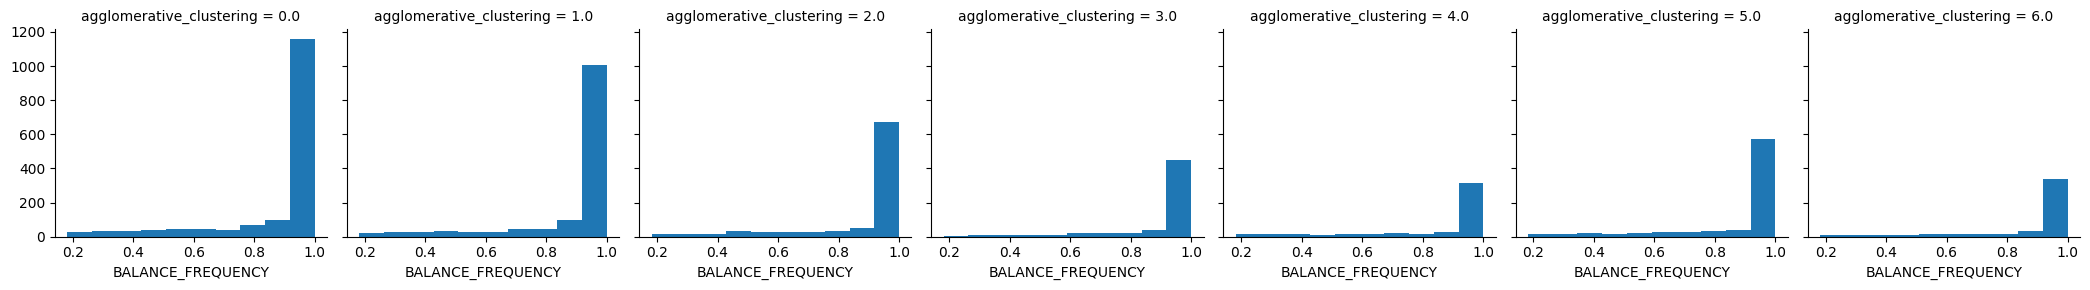

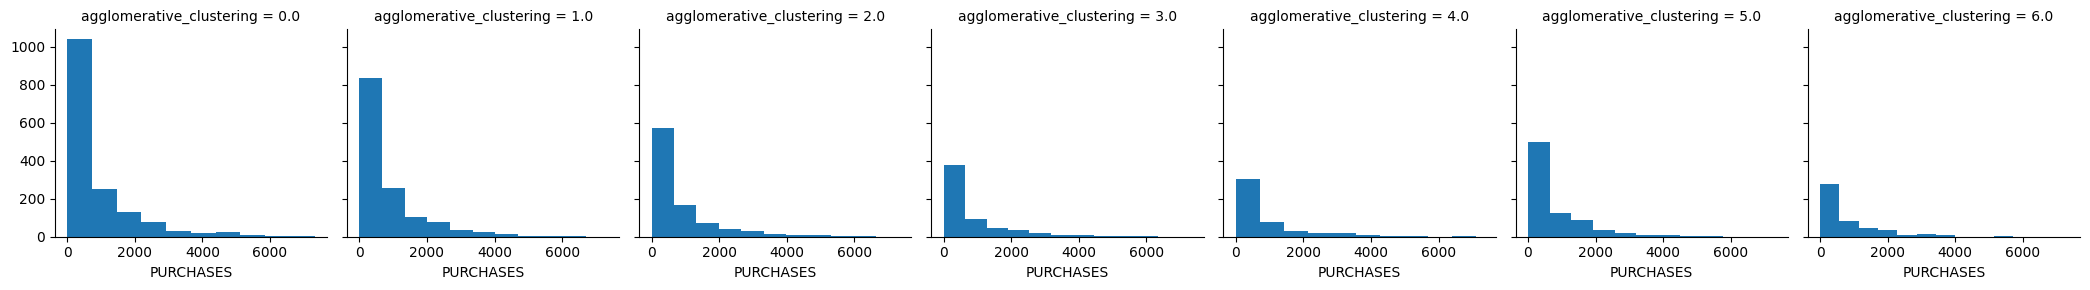

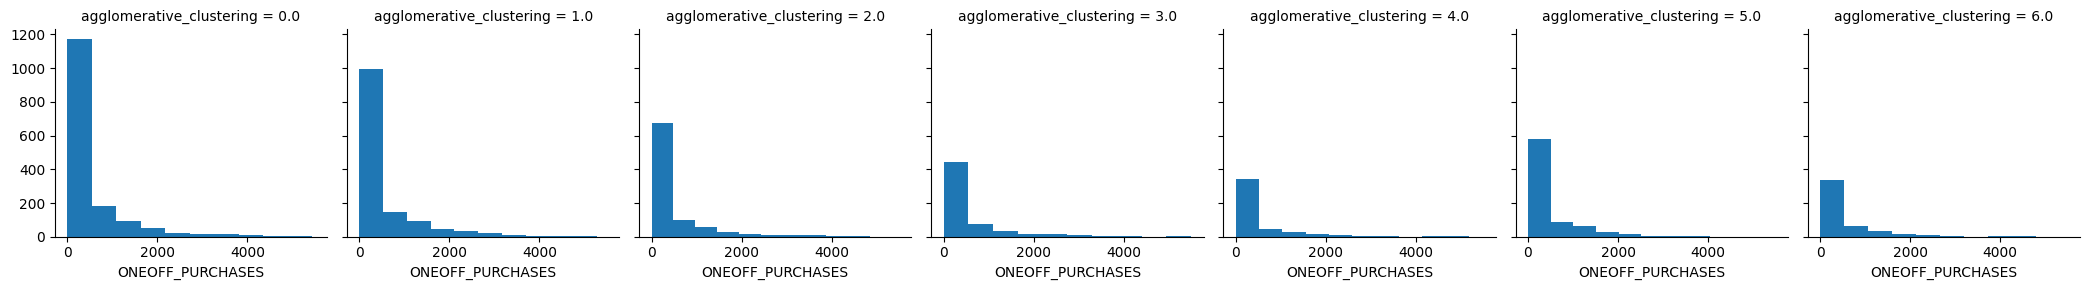

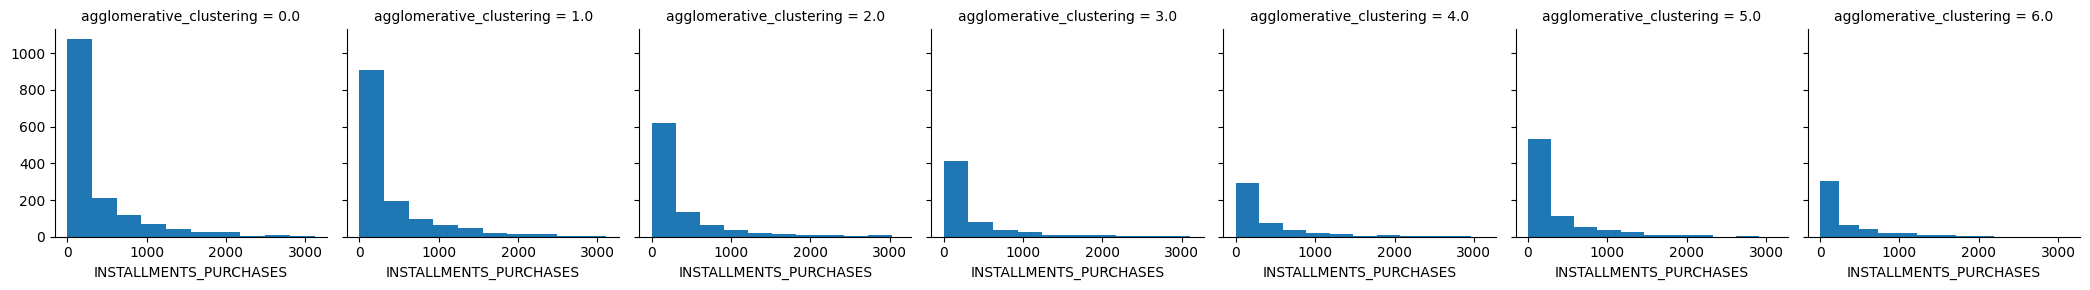

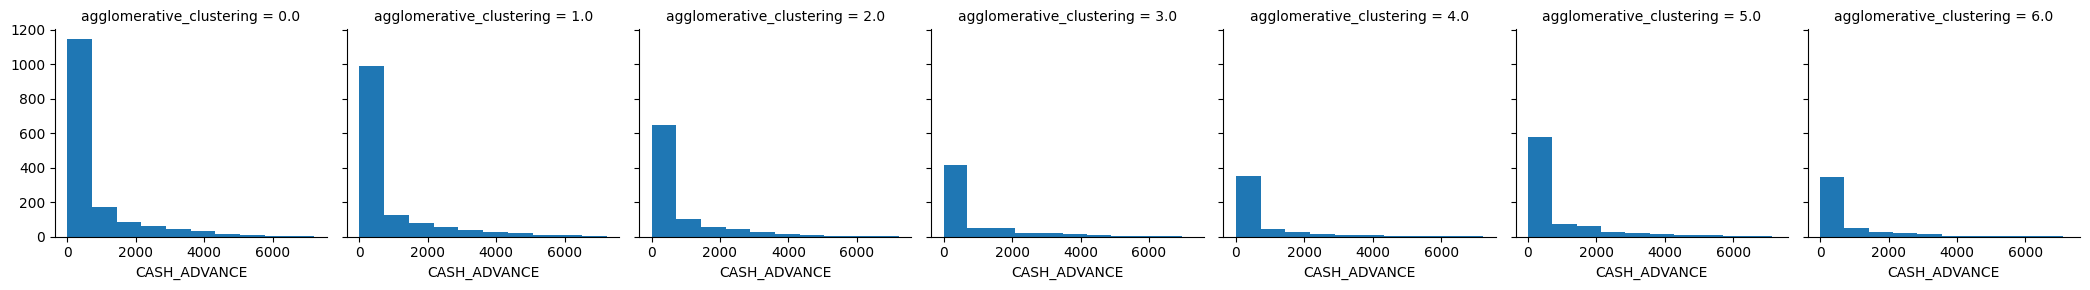

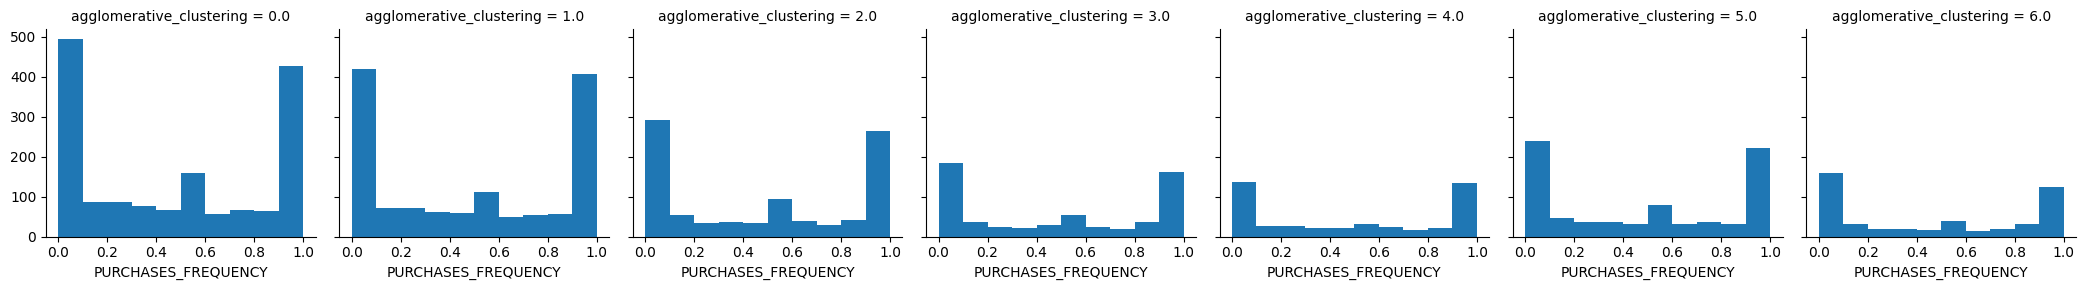

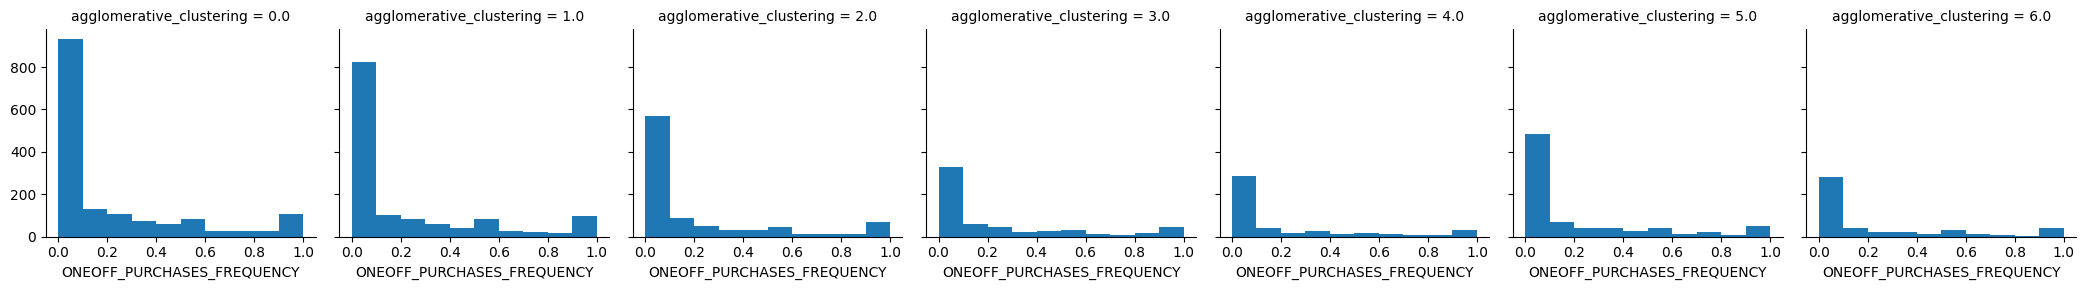

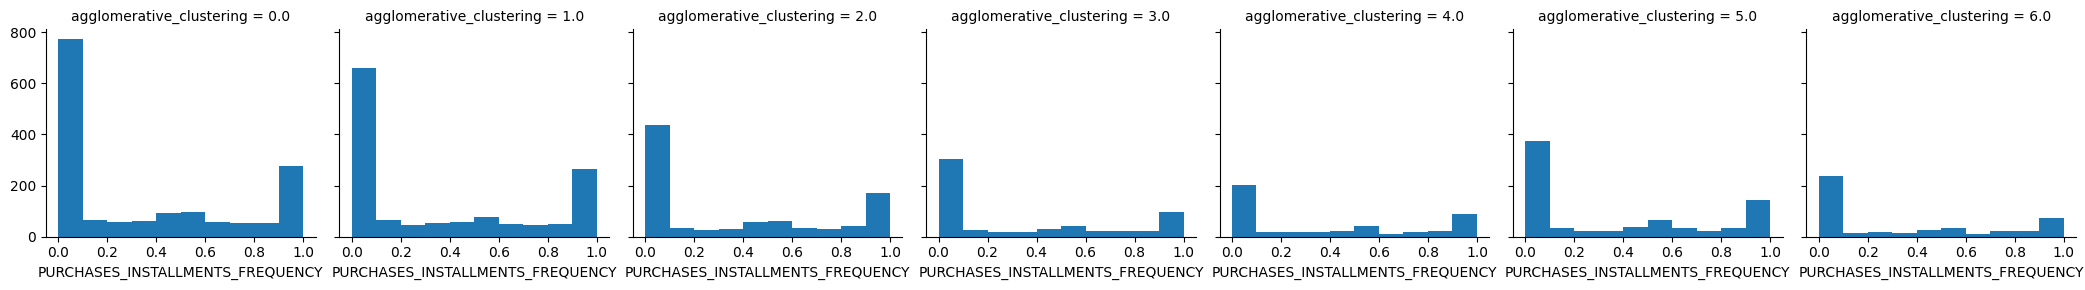

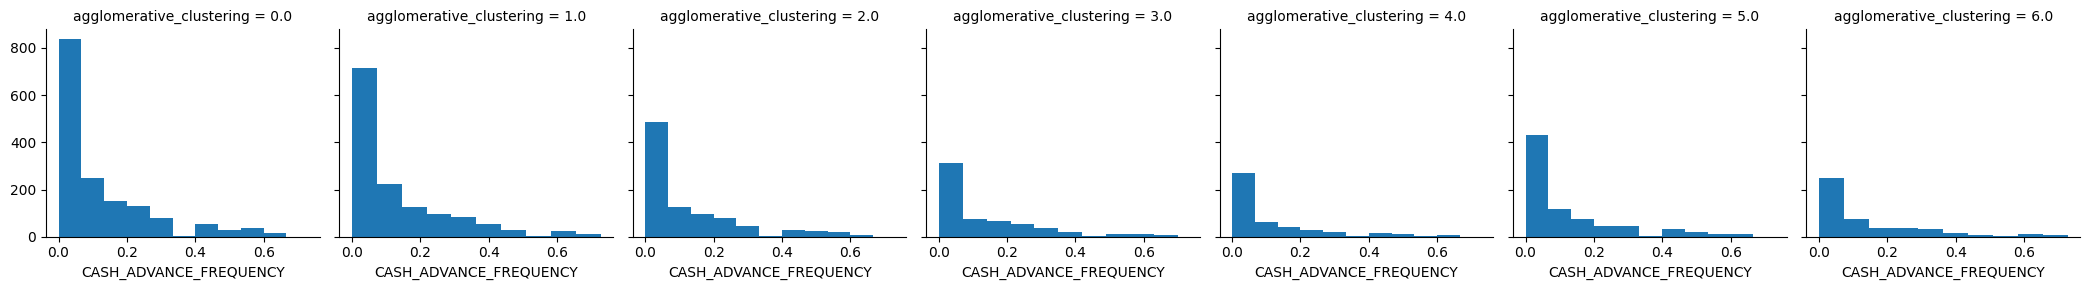

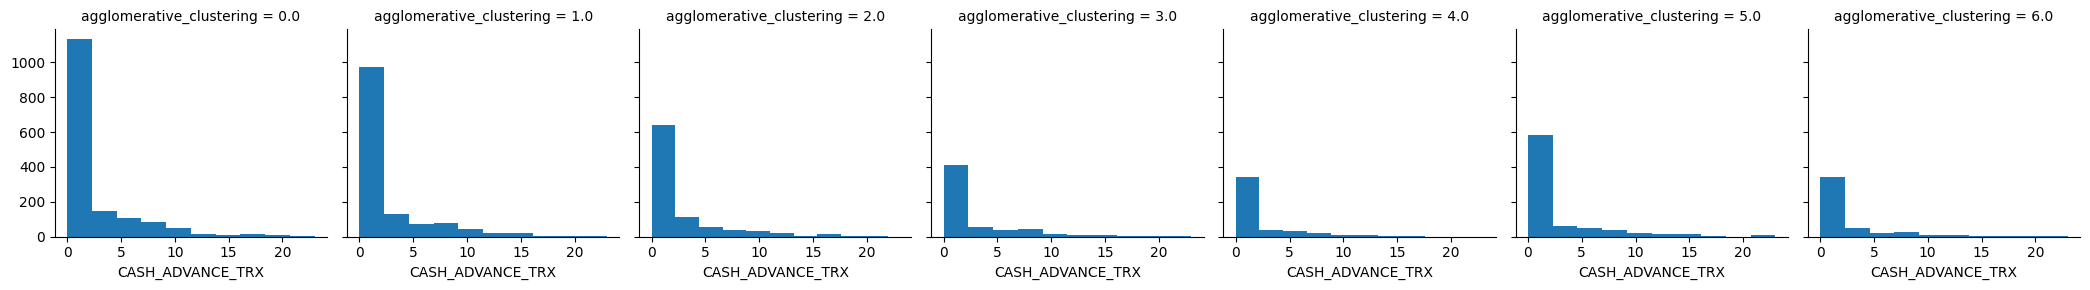

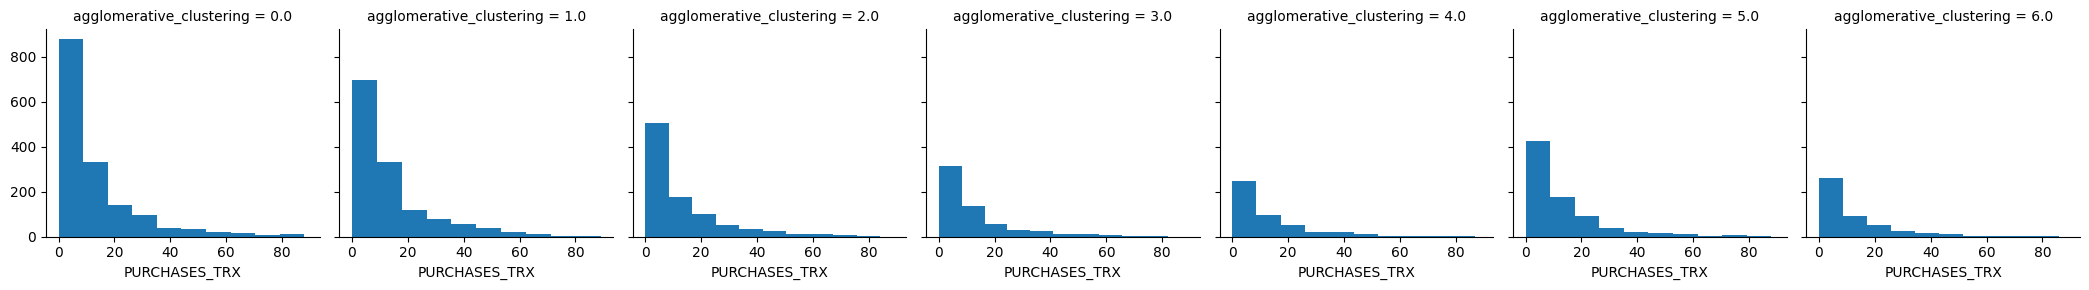

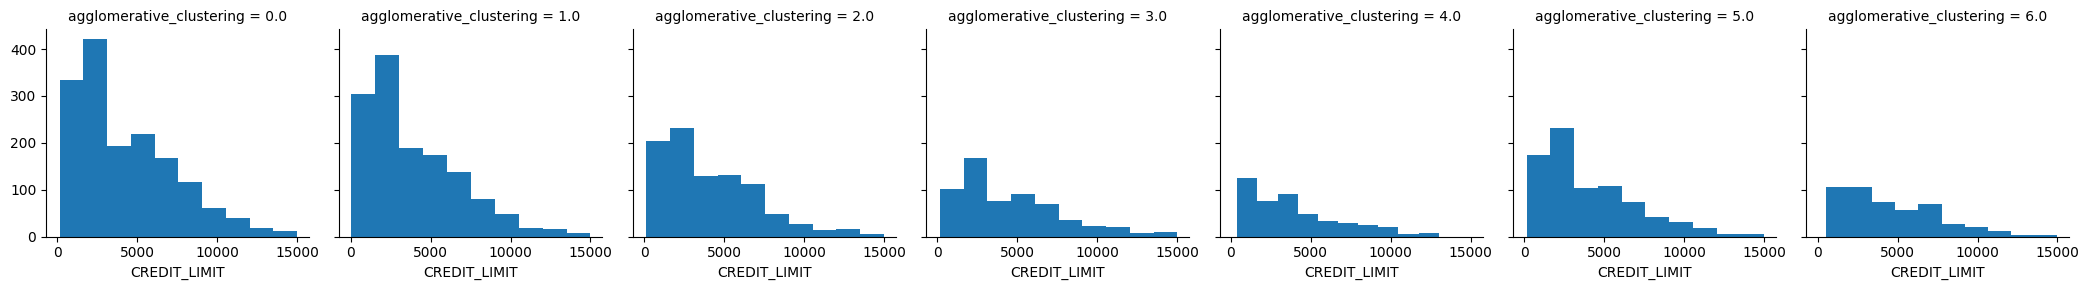

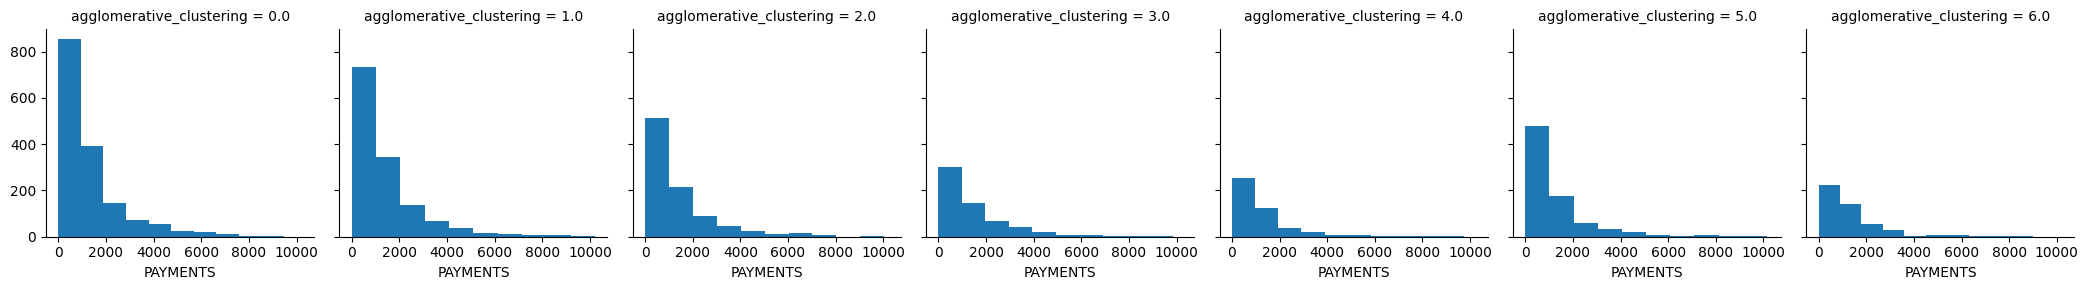

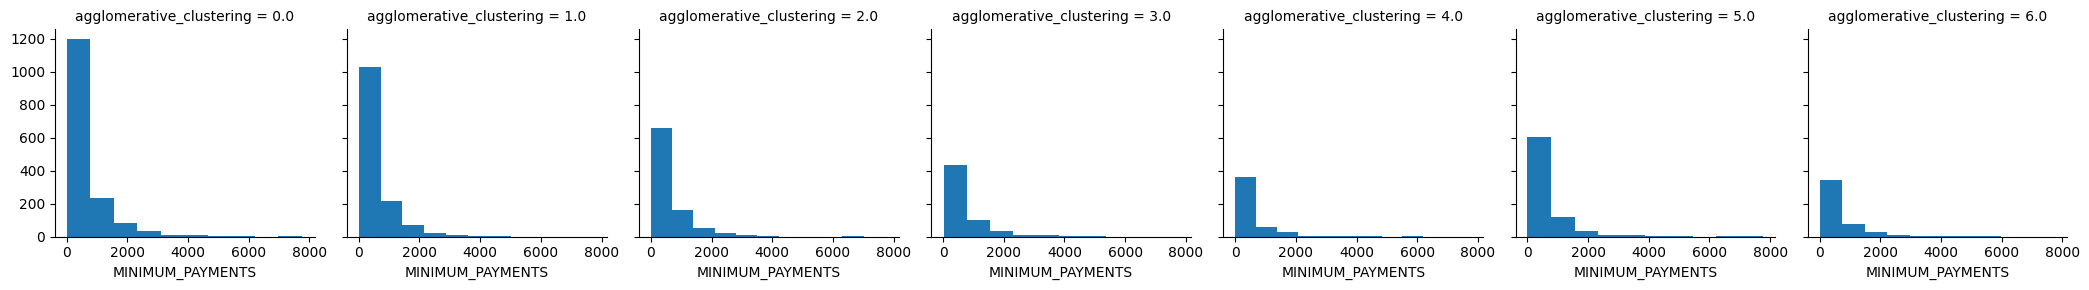

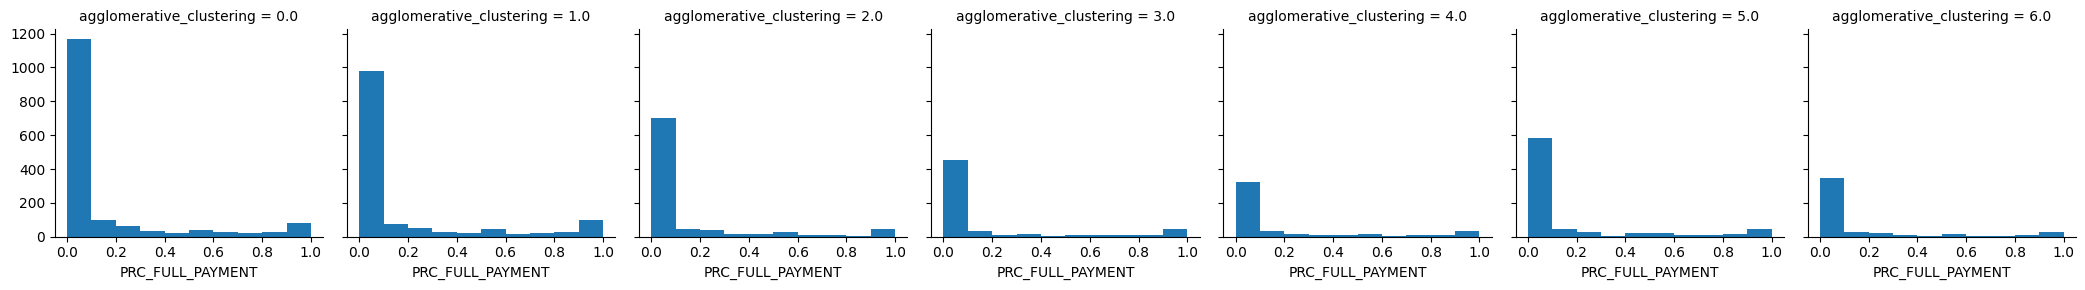

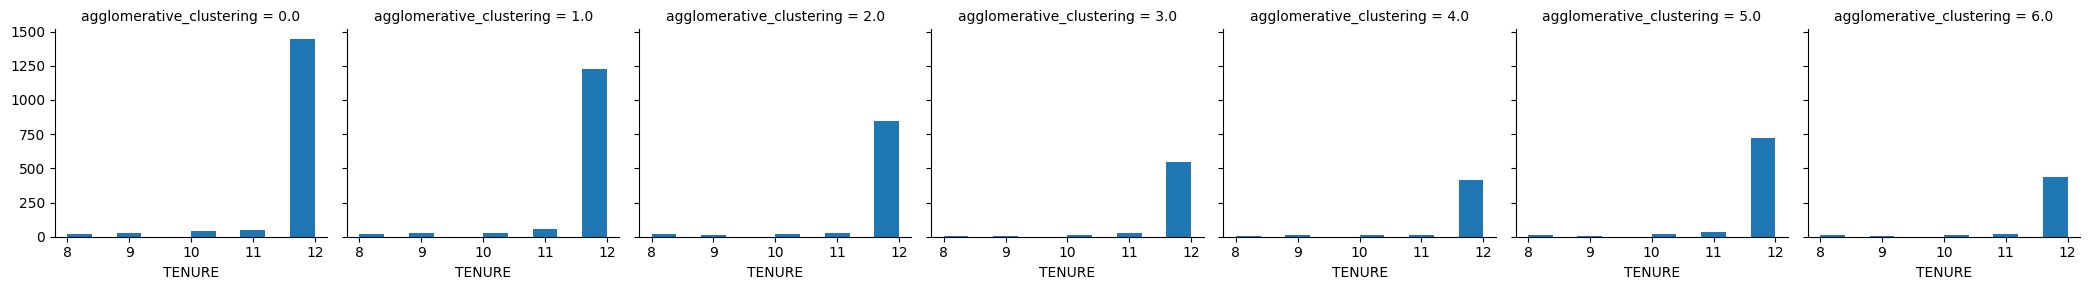

In [32]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_4, col ='agglomerative_clustering')
    g.map(plt.hist, cols)

- Applies Truncated Singular Value Decomposition (SVD) to reduce `affinities` data to 2 components.  
- Captures key patterns while preserving most of the variance in lower-dimensional space.  
- Useful for dimensionality reduction and visualization of high-dimensional data.  

In [33]:
from sklearn.decomposition import TruncatedSVD
truncated_svd = TruncatedSVD(2)
truncated_svd.fit(affinities)
see_SVD = truncated_svd.transform(affinities)

- Generates a scatter plot using Truncated SVD components to visualize customer segmentation.  
- Colors and labels clusters based on Agglomerative Clustering (7 clusters) to identify spending behavior patterns.  
- Helps in understanding distinct customer groups based on their credit card usage.  

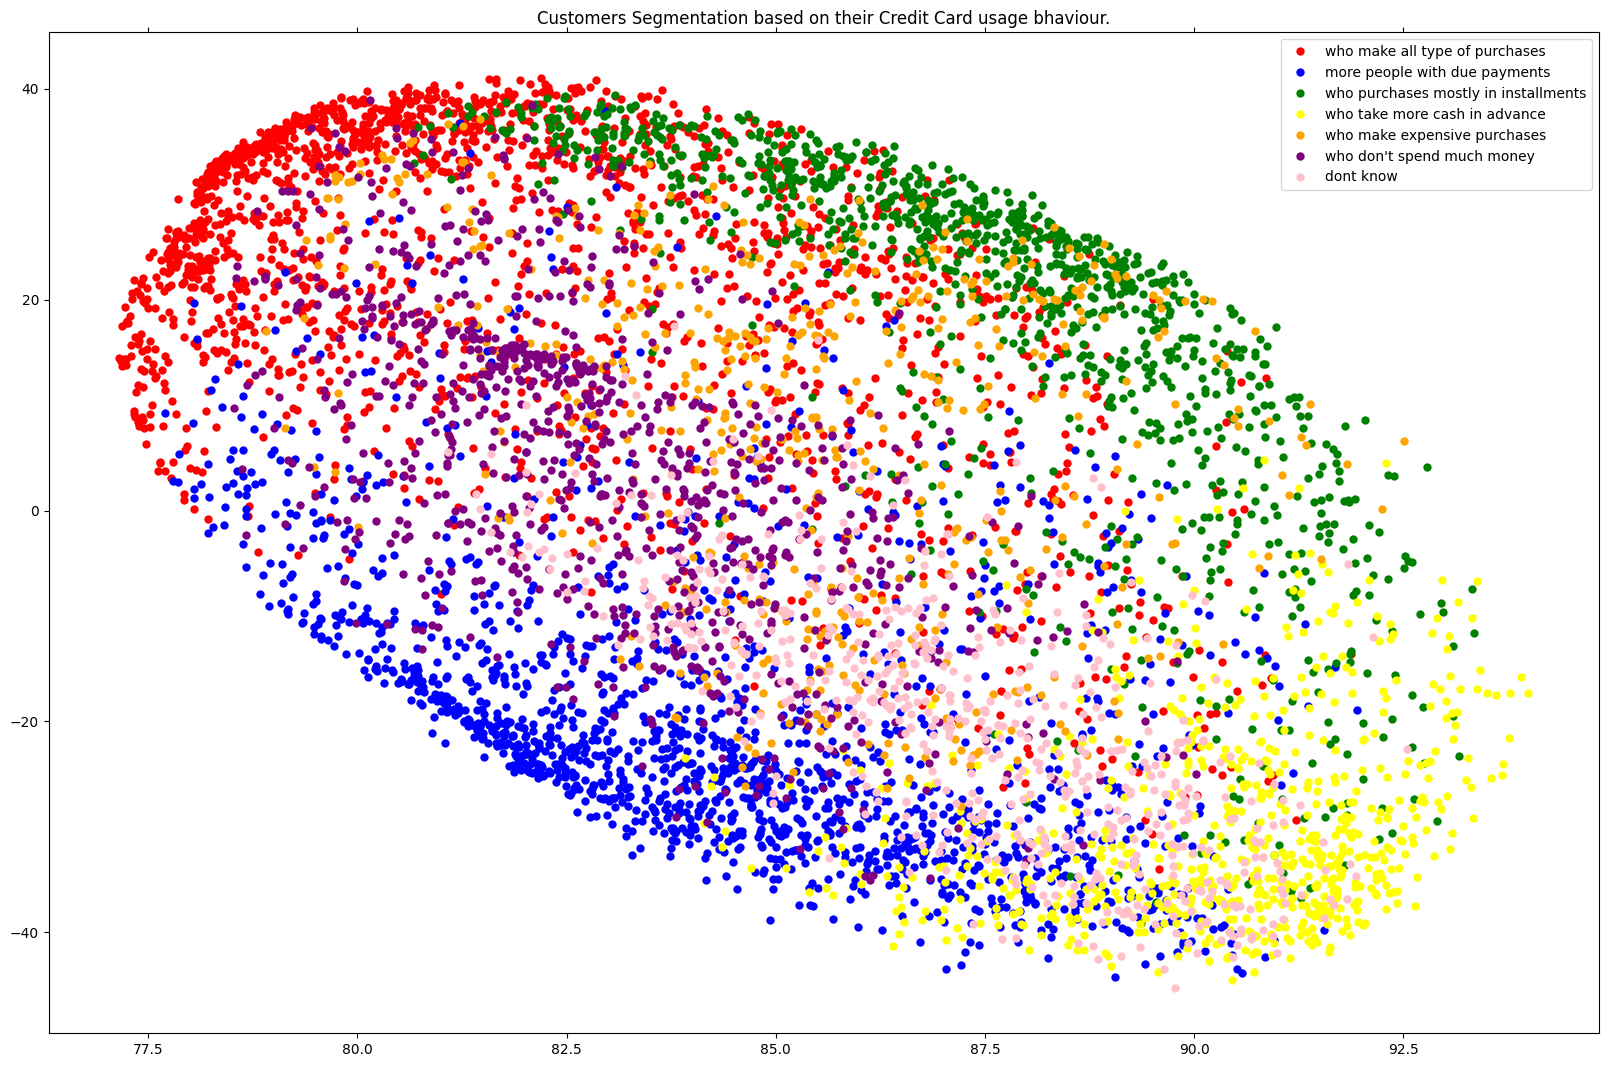

In [34]:
x, y = see_SVD[:, 0], see_SVD[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money',
         6: 'dont know'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label': agglomerative_clustering_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

### 4.DBSCAN:

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups data points based on density, identifying clusters and noise.  
- Unlike K-Means, DBSCAN can discover clusters of arbitrary shapes and is robust to outliers.  
- Requires two key parameters: `eps` (maximum distance between points) and `min_samples` (minimum points in a cluster).  

In [35]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(data_standardized)
dbscan_labels = dbscan.labels_

In [36]:
data_out_5 = pd.concat([data_out_4, pd.DataFrame({'dbscan': dbscan_labels})], axis = 1)

In [37]:
data_out_5.dbscan.unique()

array([-1.,  0.,  1.,  2.,  3.,  4.,  6.,  5.,  7.,  8.,  9., 15., 23.,
       10., 11., 12., 13., 14., 19., 16., 17., 20., 18., 24., 21., 22.,
       nan])

- Applies Isomap for dimensionality reduction with 2 components, using the number of unique DBSCAN labels as neighbors.  
- Captures non-linear relationships in the data while preserving global structure.  
- Transforms `affinities` data into a lower-dimensional representation suitable for visualization.  

In [38]:
from sklearn.manifold import Isomap
n_neighbors = len(data_out_5.dbscan.unique())  # Assuming this gives the correct number of neighbors
n_components = 2  # For 2D embedding
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components) 
isomap.fit(affinities)
X_isomap = isomap.transform(affinities)

- Visualizes DBSCAN clustering results in 2D using Isomap for dimensionality reduction.  
- Colors points based on DBSCAN labels to highlight distinct groups in the data.  
- Enhances cluster interpretation with a scatter plot, showcasing relationships between data points in a lower-dimensional space.  

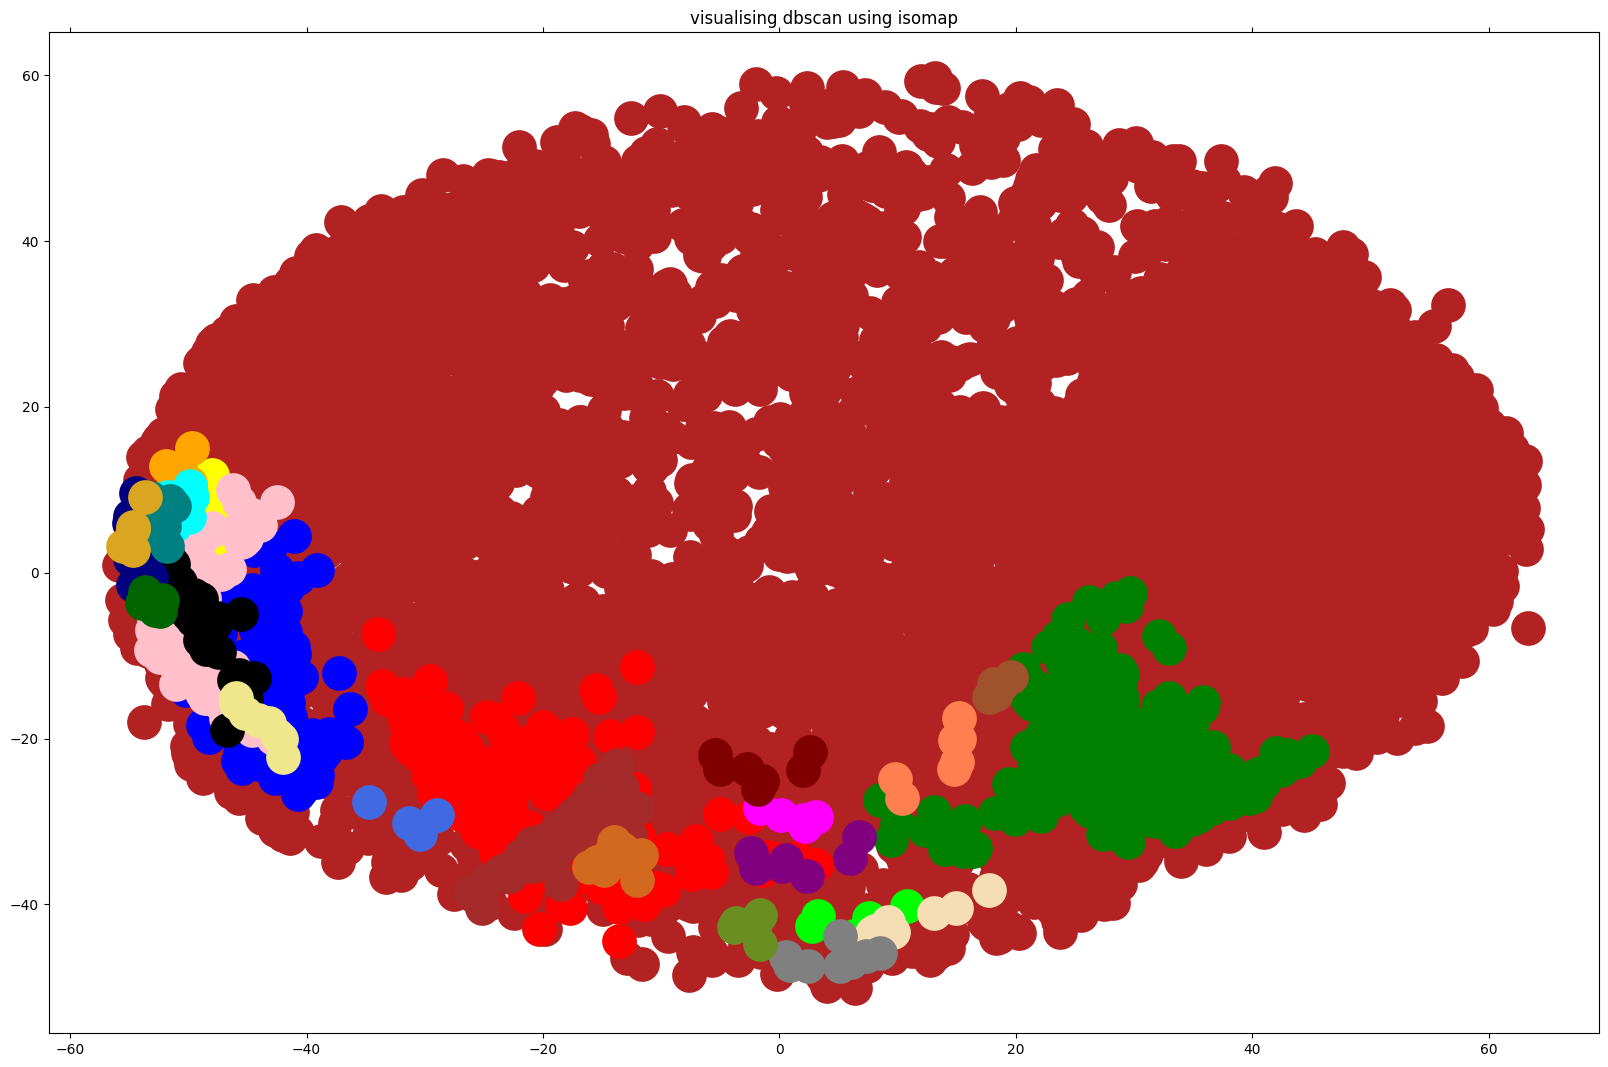

In [39]:
from matplotlib.colors import to_rgba
from matplotlib import colors as mcolors
x, y = X_isomap[:, 0], X_isomap[:, 1]


colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'orange', 5:'pink', 6:'brown', 7:'black',
          8:'khaki', 9:'lime', 10:'purple',
          11:'cyan', 12:'navy', 13:'chocolate', 14:'wheat', 15:'teal', 16:'magenta', 17:'coral',
          18: 'royalblue',19: 'maroon',20: 'grey',
          21:'darkgreen', 22:'olivedrab', 23:'goldenrod', -1:'firebrick', 24:'sienna'}
df = pd.DataFrame({'x': x, 'y':y, 'label':dbscan_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=25,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("visualising dbscan using isomap")
plt.show()

5. **OPTICS**

- OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm similar to DBSCAN but capable of handling varying cluster densities.  
- It creates a reachability plot, offering more flexibility in identifying clusters of different shapes and sizes.  
- Unlike DBSCAN, OPTICS doesn't require specifying a fixed `eps` parameter, making it more adaptive to diverse data structures.  

In [40]:
#OPTICS
from sklearn.cluster import OPTICS
optics = OPTICS()
optics.fit(data_standardized)
optics_labels = optics.labels_

In [41]:
data_out_6 = pd.concat([data_out_5, pd.DataFrame({'optics': optics_labels})], axis = 1)

In [42]:
data_out_6.optics.unique()

array([-1., 25.,  9., 67., 85., 39., 52.,  0., 37., 71., 32., 63., 94.,
       28., 72., 42., 33., 60., 49., 87., 51., 92.,  3., 59., 73., 41.,
       56., 66.,  4., 74., 20., 18.,  1., 65., 57., 10., 27., 69., 70.,
       75., 81., 84., 40., 68., 12., 21., 13., 43.,  2., 62., 17., 64.,
       36., 38., 26., 78., 19., 46., 54., 35., 47., 83., 86., 31., 95.,
       91., 29., 89., 55.,  8., 50.,  7., 22., 53., 58., 90., 44., 24.,
       30., 77.,  6., 15., 48., 80., 45., 82., 76., 61., 34., 88., 23.,
       16., 11., 14., 93., 79.,  5., nan])

6.**Spectral Clustering**

- Spectral Clustering leverages eigenvalues of the similarity matrix to reduce dimensionality and identify clusters in complex data.  
- It is effective for non-linearly separable data and can work with any similarity measure, such as cosine similarity or Gaussian kernel.  
- Often used for graph-based clustering, Spectral Clustering excels in detecting clusters with complex, non-convex shapes.  

In [43]:
#Spectral clustering:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(7)
spectral_clustering.fit(data_standardized)
spectral_clustering_labels = spectral_clustering.labels_

In [44]:
data_out_7 = pd.concat([data_out_6, pd.DataFrame({'spectral_clustering': spectral_clustering_labels})], axis = 1)

In [45]:
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 7  # Number of neighbors
n_components = 2  # Target dimensionality

locally_linear_embedding = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)  # Use keyword arguments
locally_linear_embedding.fit(affinities)
see_LLE = locally_linear_embedding.transform(affinities)


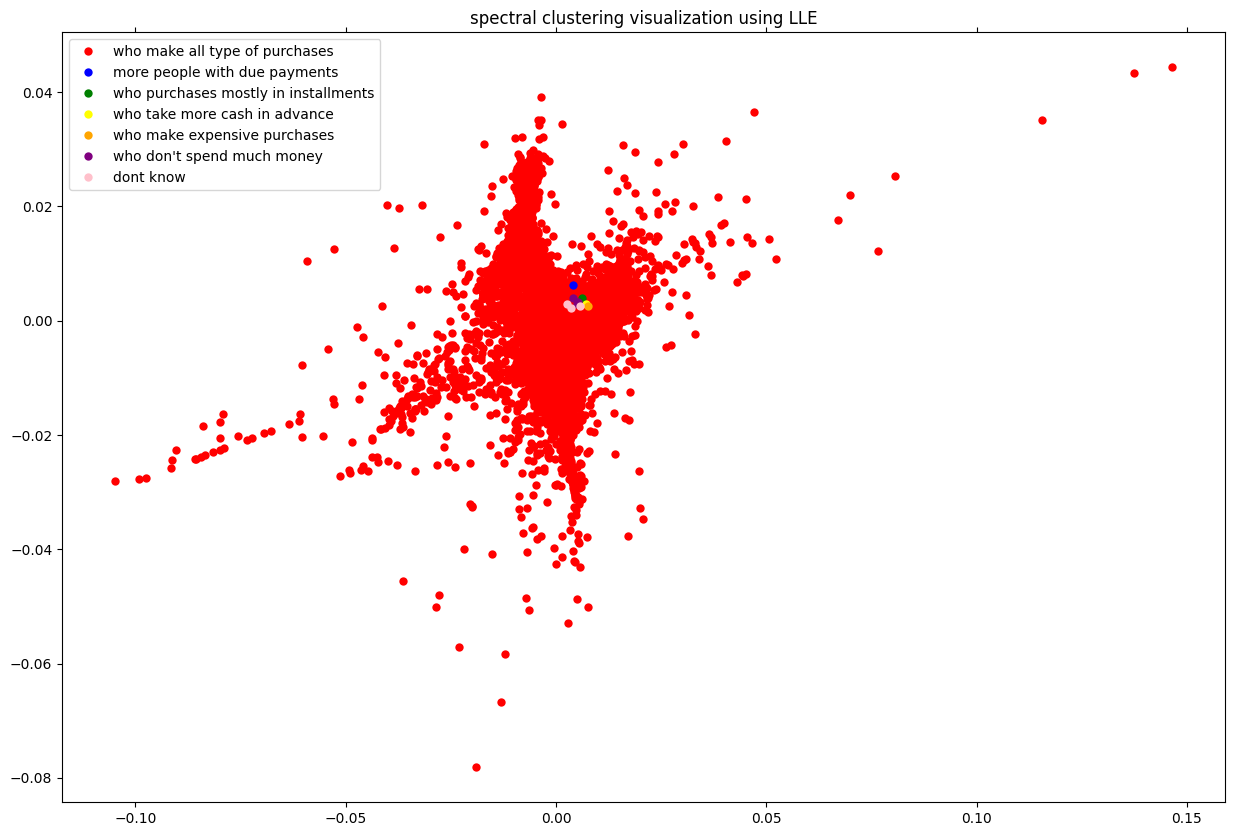

In [46]:
x, y = see_LLE[:, 0], see_LLE[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money',
         6: 'dont know'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label': spectral_clustering_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("spectral clustering visualization using LLE")
plt.show()

# 7. Mean Shift Clustering with Spectral Embedding  

This process applies **Mean Shift clustering** to a standardized dataset to identify natural groupings without predefining the number of clusters. 

The **Spectral Embedding** technique reduces dimensionality, projecting data into a 2D space for visualization. 

Each cluster is assigned a unique color and plotted to highlight its distribution. 

The visualization helps in understanding underlying patterns in the data and provides insights into cluster structures. 

This approach is useful in anomaly detection, segmentation, and exploratory data analysis.


In [47]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
mean_shift.fit(data_standardized)
mean_shift_labels = mean_shift.labels_

In [48]:
data_out_8 = pd.concat([data_out_7, pd.DataFrame({'mean_shift': mean_shift_labels})], axis = 1)

In [49]:
data_out_8 = data_out_8.dropna()
data_out_8.mean_shift.unique()

array([0., 9., 4., 2., 6., 7., 8., 1., 5.])

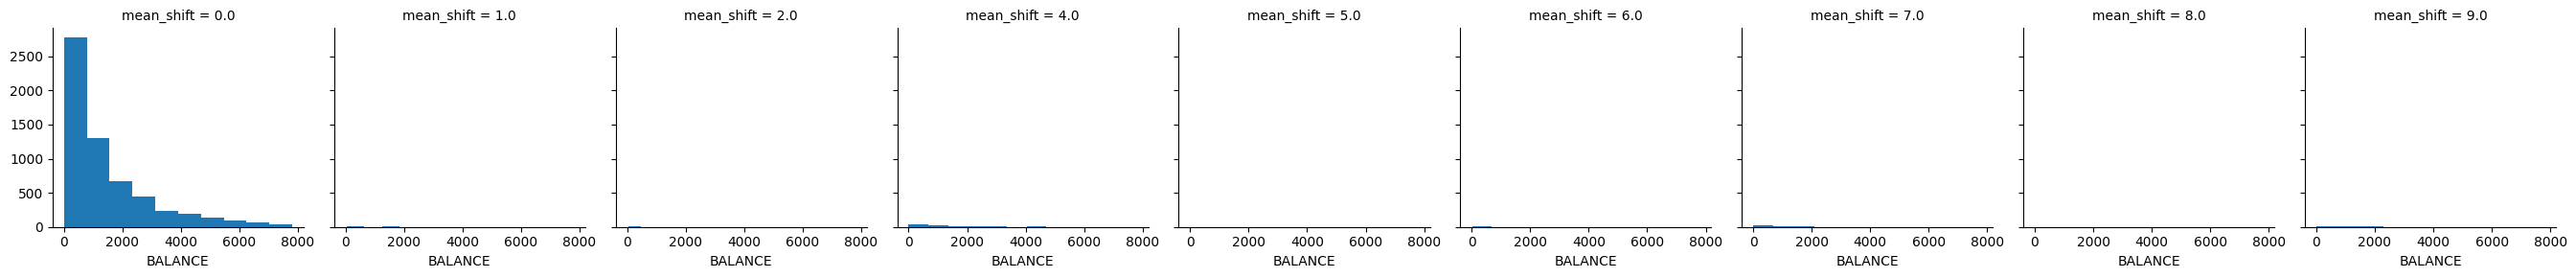

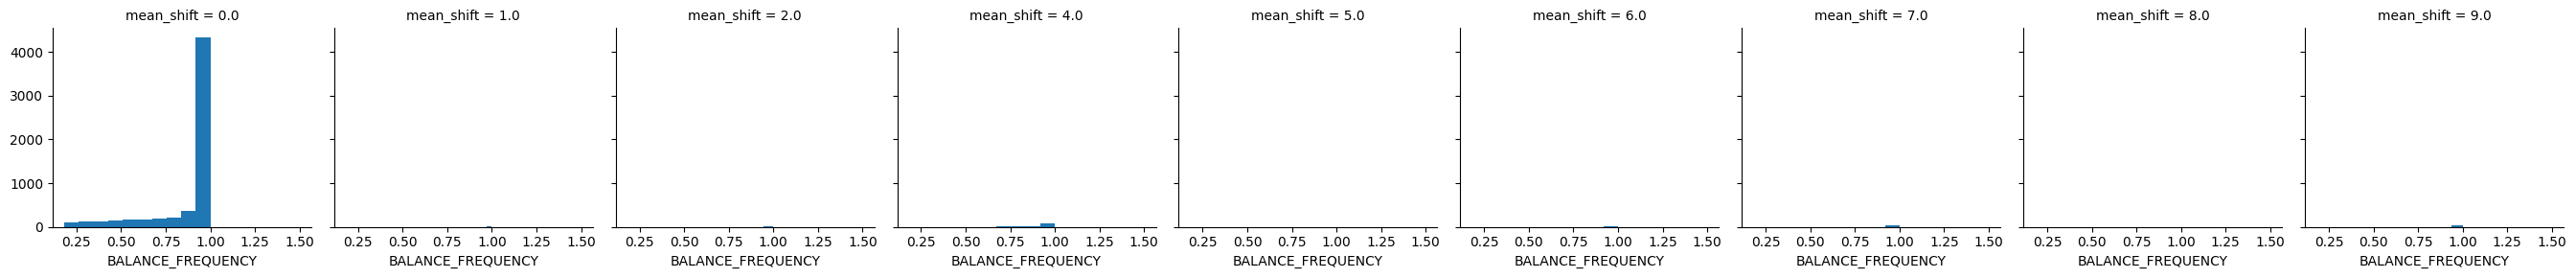

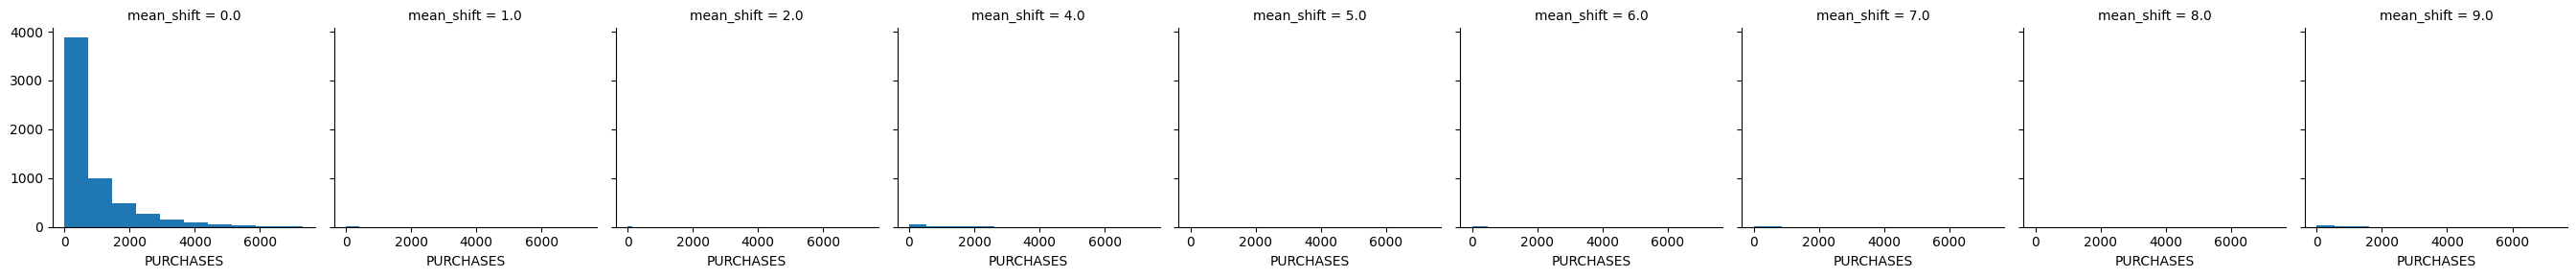

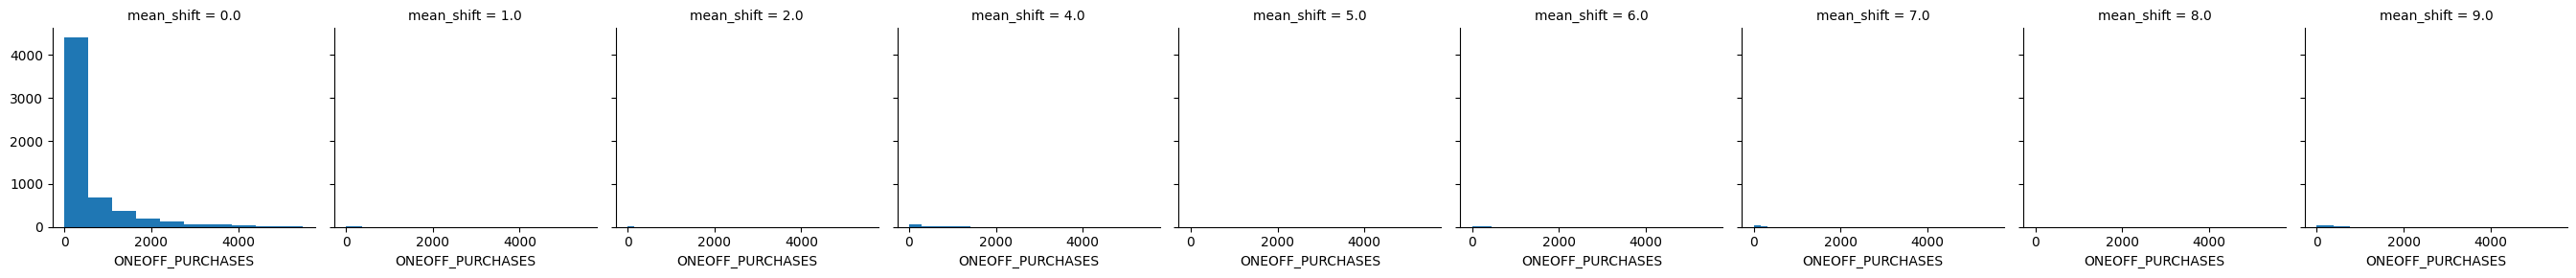

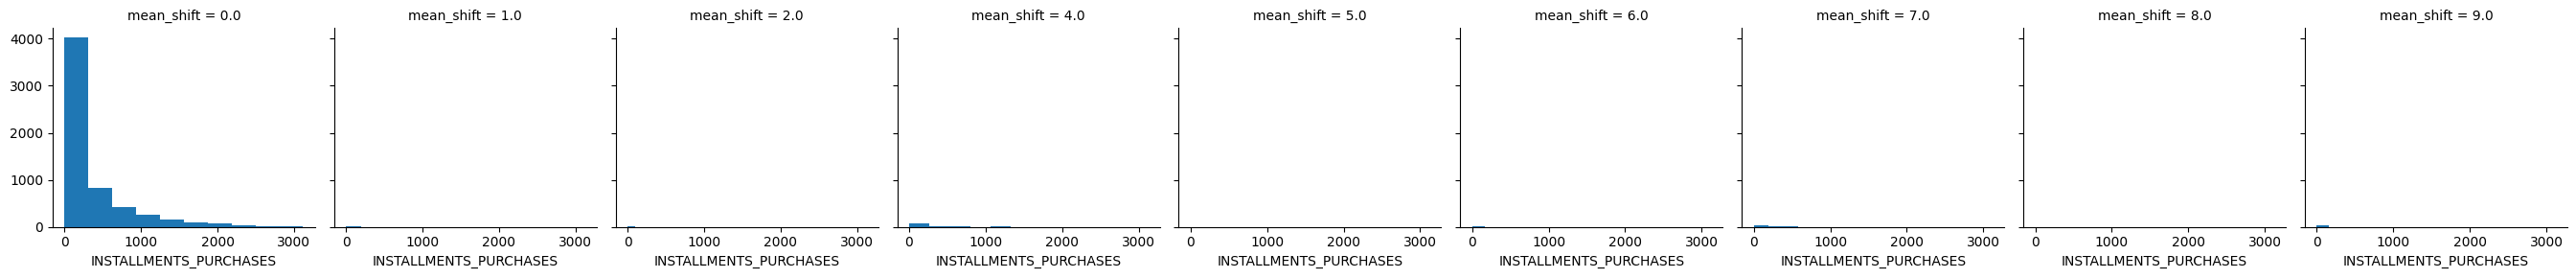

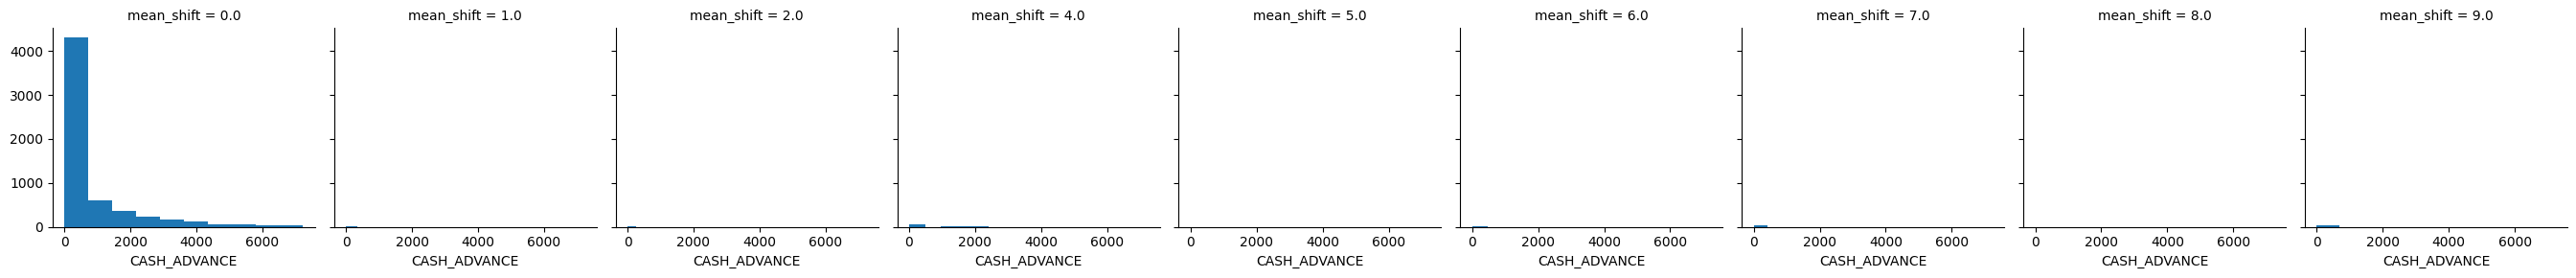

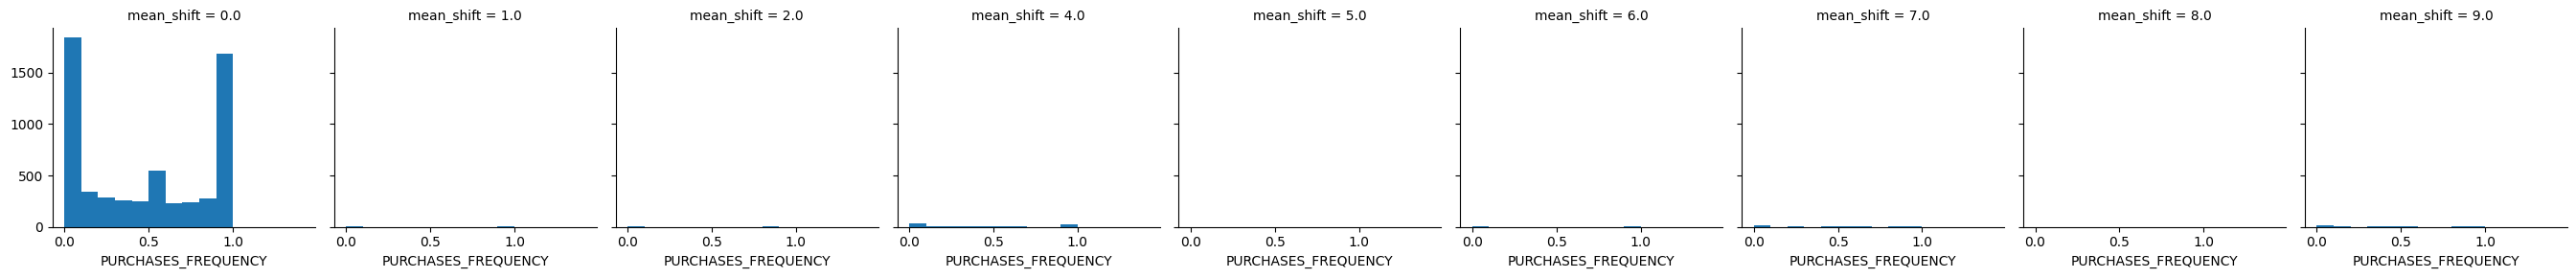

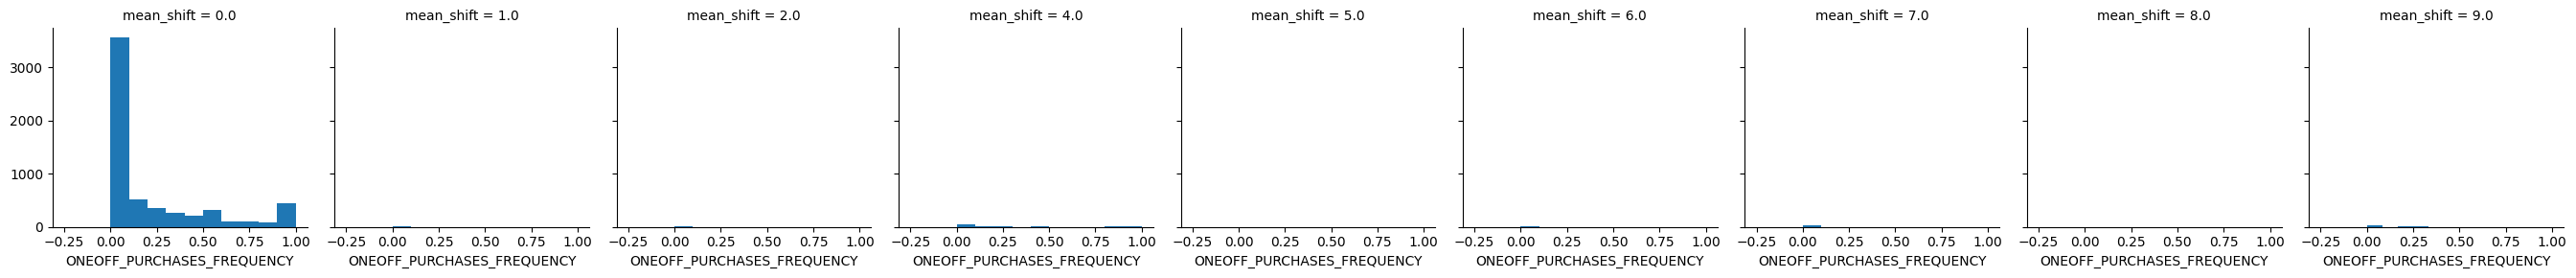

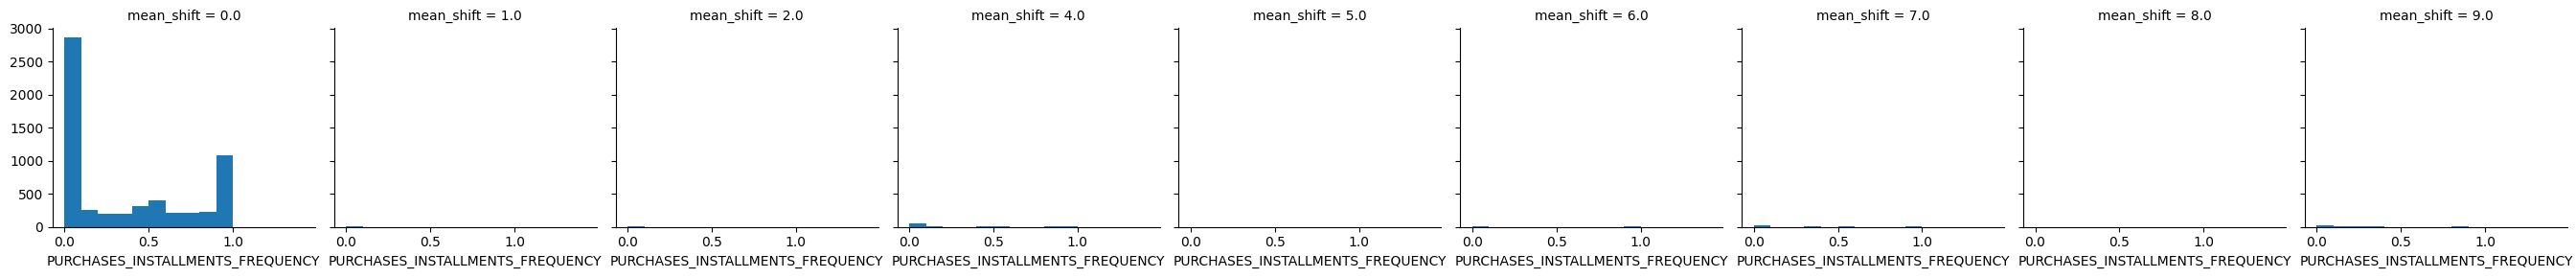

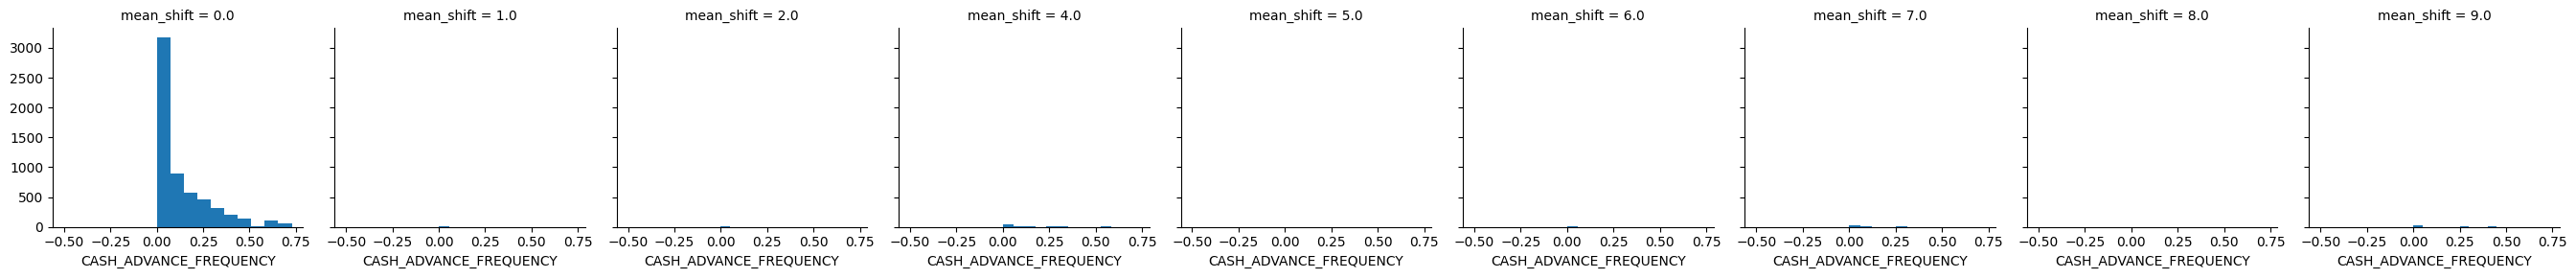

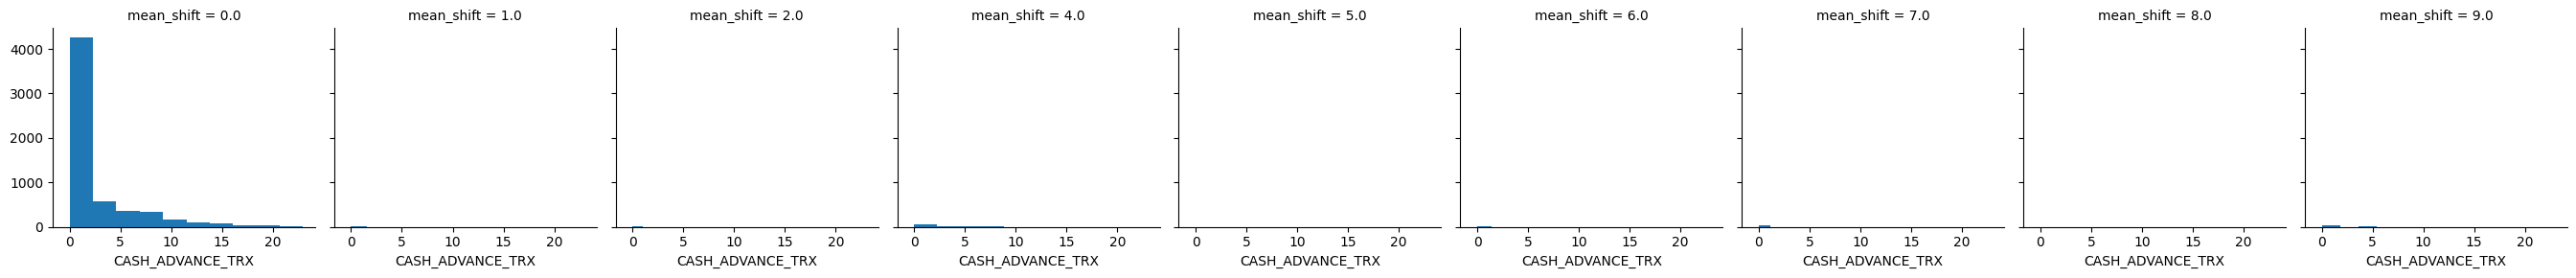

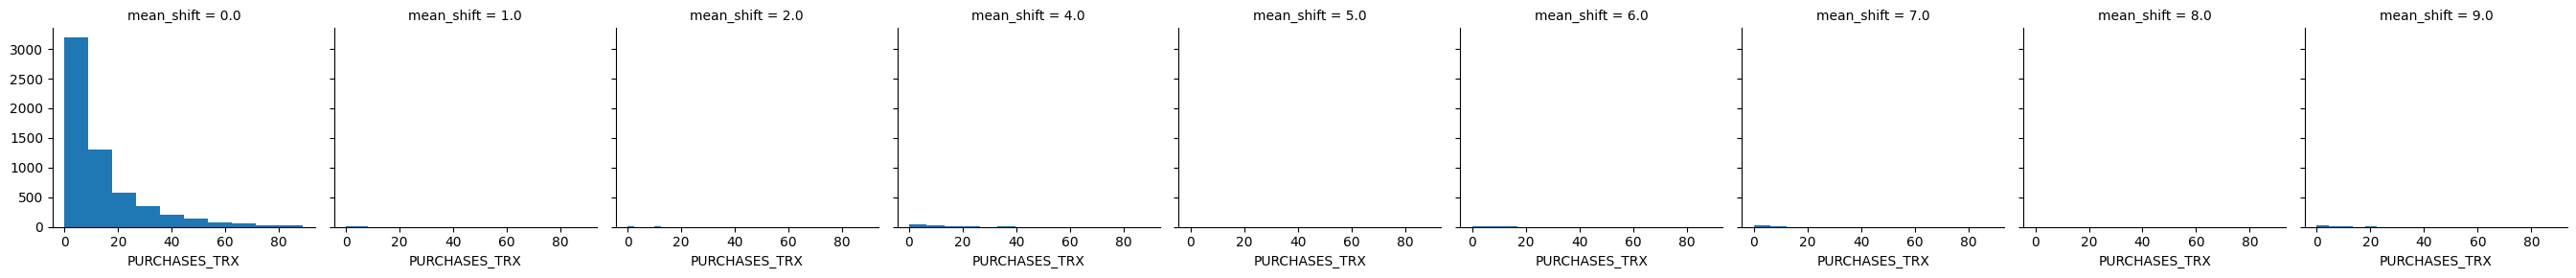

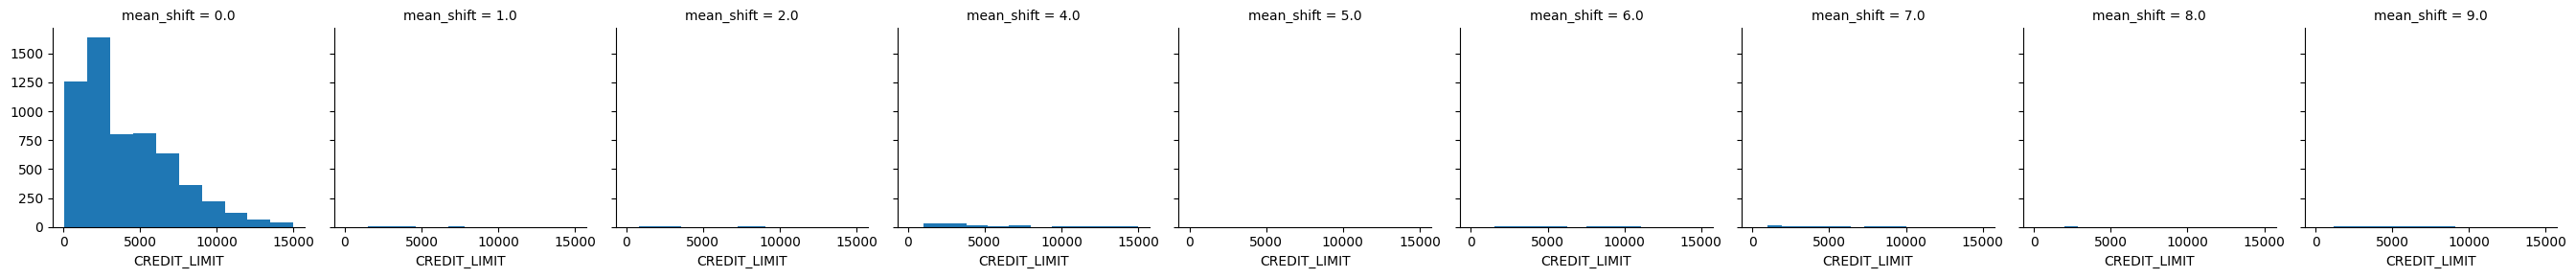

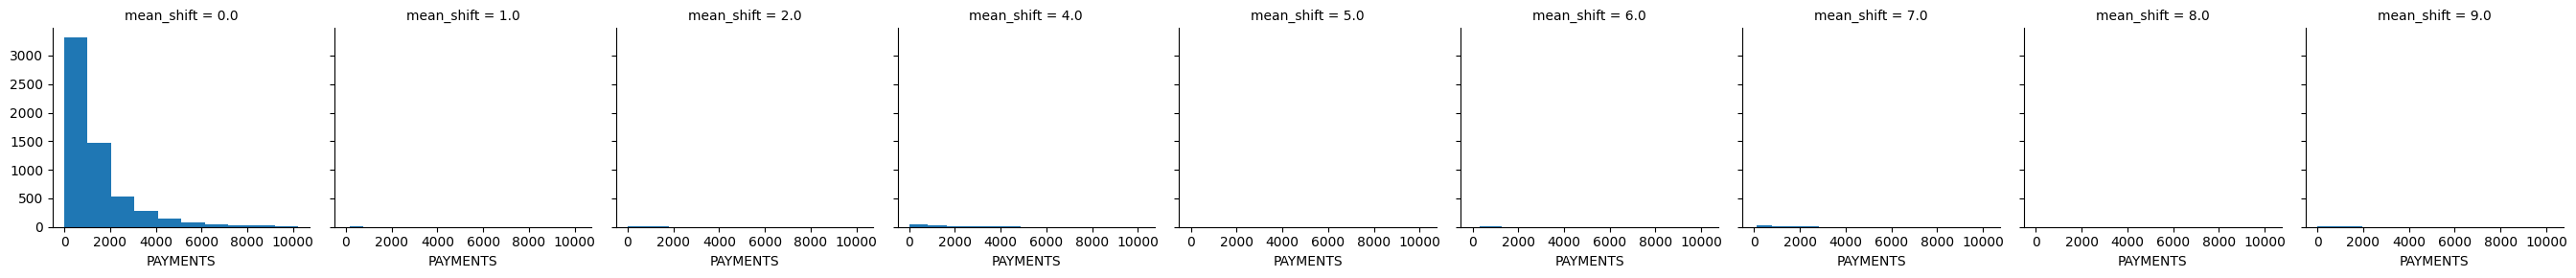

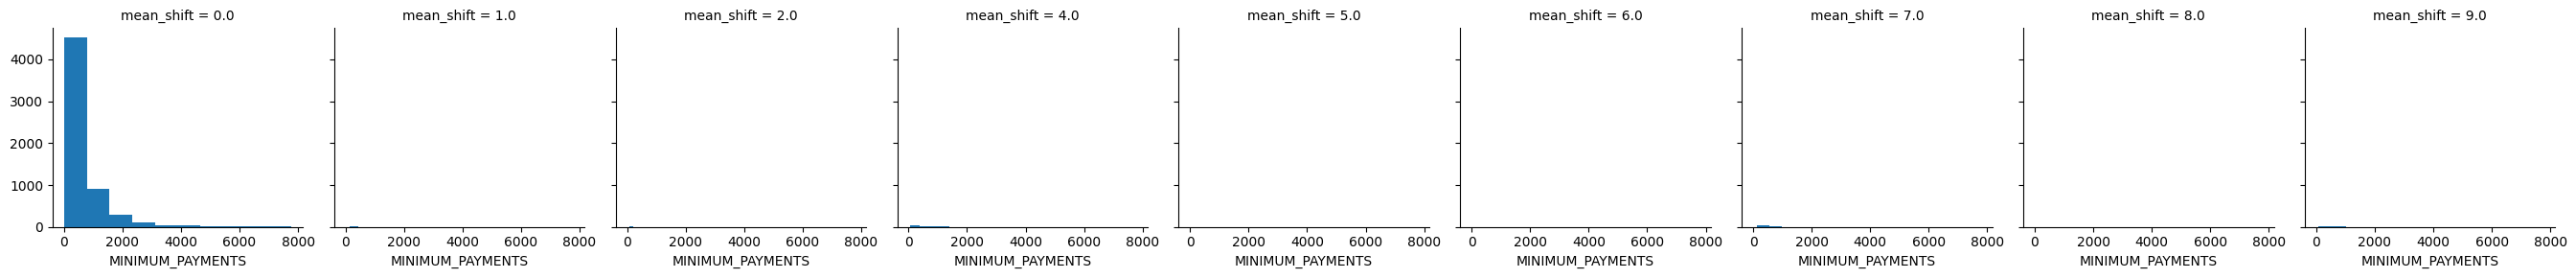

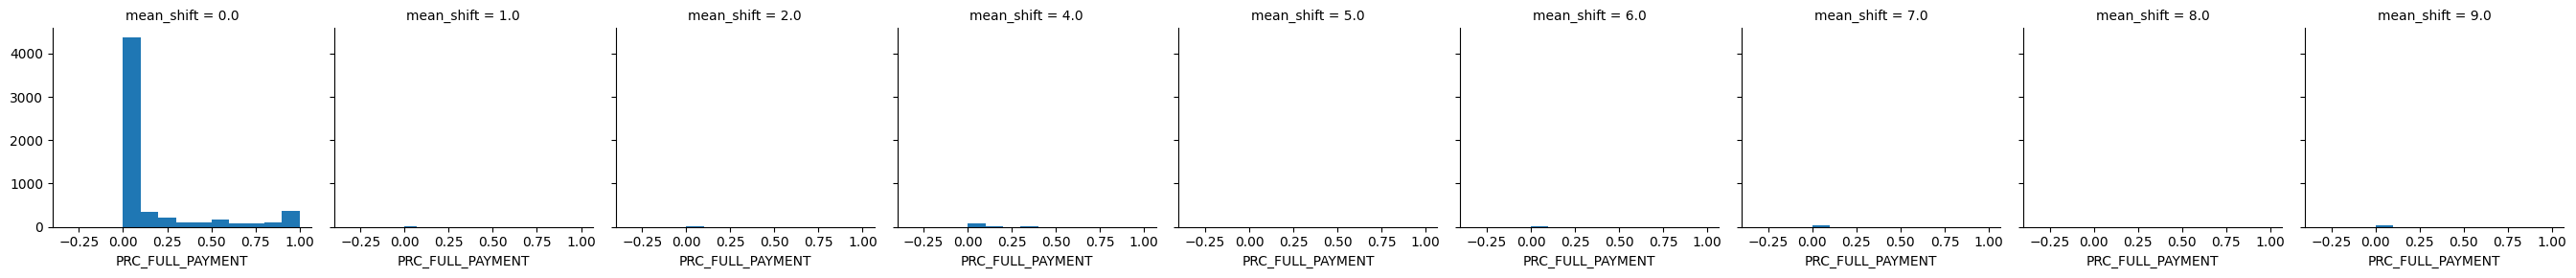

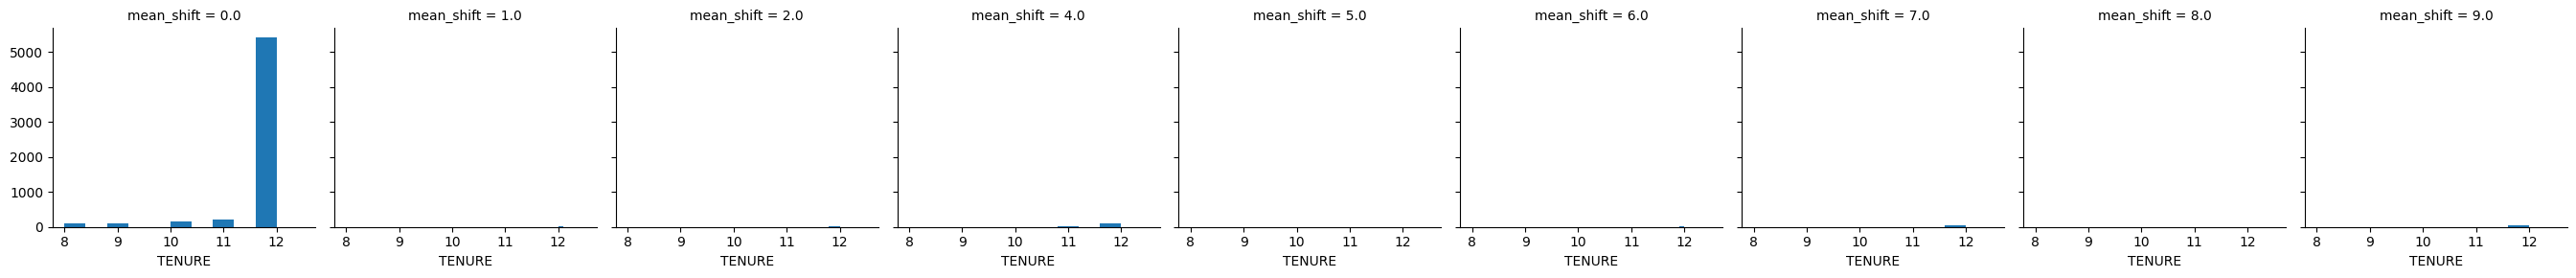

In [50]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_8, col ='mean_shift')
    g.map(plt.hist, cols)

In [51]:
from sklearn.manifold import SpectralEmbedding
spectral_embedding = SpectralEmbedding(2)
X_spectral_embedding = spectral_embedding.fit_transform(affinities)

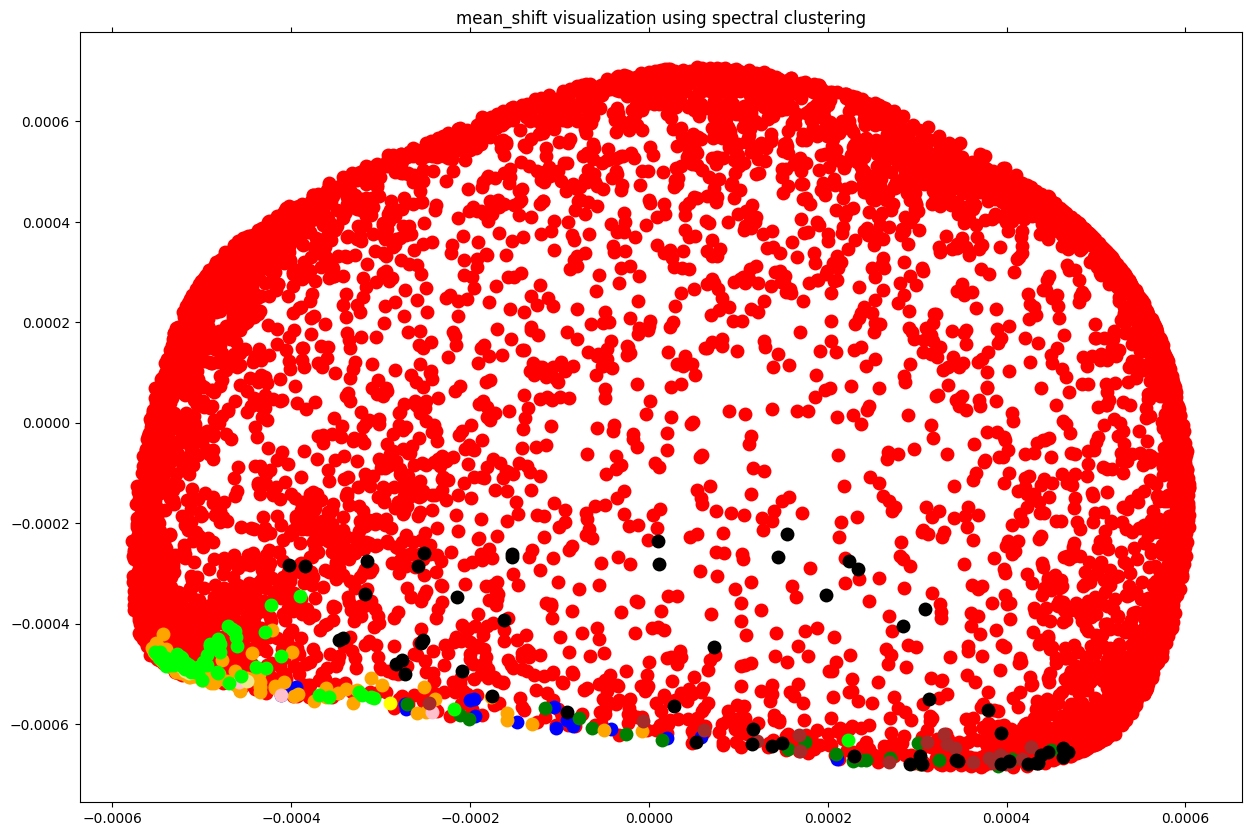

In [52]:
x, y = X_spectral_embedding[:, 0], X_spectral_embedding[:, 1]

colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'orange', 5:'pink', 6:'brown', 7:'black',
          8:'khaki', 9:'lime', 10:'purple'}

df = pd.DataFrame({'x': x, 'y':y, 'label':mean_shift_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("mean_shift visualization using spectral clustering")
plt.show()

### **Results**

*   **Clusters formed by K-Means** show distinct transaction groups based on spending habits.
    
*   **DBSCAN identifies outliers**, which may correspond to **fraudulent transactions**.
    
*   **PCA visualization** confirms that fraudulent activities may lie in **isolated clusters** or extreme points.
    
*   Different clustering techniques provide complementary insights, helping analysts flag high-risk transactions.
    

### **Discussion & Conclusion**

This project successfully demonstrates how **unsupervised learning** techniques can help detect anomalies in financial transactions. By applying **clustering algorithms and PCA**, we identify **potential fraud cases** without labeled fraud data. While K-Means provides structured groups, DBSCAN effectively highlights **outliers**, making it a strong candidate for fraud detection. However, real-world deployment requires **further validation**, integration with **supervised fraud detection models**, and periodic model retraining. **Future improvements** may include combining clustering with **graph-based fraud analysis** and anomaly detection via deep learning.

This project analyzes credit card transaction data using clustering techniques and Principal Component Analysis (PCA) to detect patterns and potential fraud. The dataset is first preprocessed by handling missing values, standardizing features, and removing unnecessary columns. Clustering methods such as K-Means, DBSCAN, and Affinity Propagation are applied to group similar transactions, helping to identify anomalies that may indicate fraudulent activity. PCA is used to reduce the dataset's complexity while preserving essential information, making visualization and clustering more efficient. Finally, various graphs and charts are generated to interpret the results, providing insights into transaction behavior and fraud detection.